In [1]:
#About the data:
#https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# State	                    : 거주구역
# Sex	                    : 성별
# GeneralHealth	            : 일상적인 몸 상태 [Excellent, Very good, Good, Fair, Poor]
# PhysicalHealthDays	    : 30일 기준, 질병이나 부상 등 신체적으로 아픈 날 수
# MentalHealthDays	        : 30일 기준, 우울이나 스트레스 등 정신적으로 아픈 날 수
# LastCheckupTime	        : 마지막으로 검진 받은 기록 [1년 이내, 1~2년, 2~5년, 5년 이상]
# PhysicalActivities	    : 운동 / 신체적 활동 있는지
# SleepHours	            : 수면 시간
# RemovedTeeth	            : 발치 수
# HadHeartAttack	        : 심장마비 경험
# HadAngina                 : 협심증
# HadStroke                 : 뇌졸증
# HadAsthma                 : 천식
# HadSkinCancer             : 피부암
# HadCOPD                   : 만성폐쇄성폐질환
# HadDepressiveDisorder     : 우울증
# HadKidneyDisease          : 신부증
# HadArthritis              : 관절염
# HadDiabetes               : 당뇨 [당뇨 아님, 전당뇨거나 경계성 당뇨, 임신성 당뇨, 당뇨]
# DeafOrHardOfHearing       : 청각장애
# BlindOrVisionDifficulty	: 시각장애
# DifficultyConcentrating	: 집중하기 힘듦
# DifficultyWalking	        : 걷기 힘듦
# DifficultyDressingBathing	: 스스로 옷을 입거나 씻기 힘듦
# DifficultyErrands	        : 일상 업무에 어려움
# SmokerStatus	            : 흡연자 [비흡연자, 금연, 종종 흡연, 매일 흡연]
# ECigaretteUsage	        : 전자담배 흡연자 [경헙 없음, 현재는 사용하지 않음, 종종 흡연, 매일 흡연]
# ChestScan	                : 가슴 CT 나 X-ray 촬영 여부
# RaceEthnicityCategory	    : 인종 [히스패닉, 흑인, 백인, 여러인종, 다른 인종) [다른 인종들은 히스패닉이 아닌 경우에만 표시]
# AgeCategory	            : 나이 카테고리 [18~24, 25~29, 30~34, 35~39, 40~44, 45~49, 50~54, 55~59, 60~64, 65~69, 70~74, 75~79, 80이상]
# HeightInMeters	        : 키
# WeightInKilograms	        : 몸무게
# BMI	                    : BMI
# AlcoholDrinkers	        : 음주 여부
# HIVTesting	            : HIV 검사 결과
# FluVaxLast12	            : 12개월 안에 감기 백신 접종 여부
# PneumoVaxEver	            : 폐렴 백신 접종 경험
# TetanusLast10Tdap	        : 10년 안에 파상풍 주사 경험 [경험 없음, Tdap 주사, Tdap 외의 다른 약물 주사, 어떤 약물인지 모름]
# HighRiskLastYear	        : 지난해 위험한 사고나 질병 경험 유무
# CovidPos                  : 코로나 확진 여부


# KR_columns = ['거주지역', '성별', '평균 몸 상태', '신체적 통증 유발 수(1개월)',
#        '정신적 통증 유발 수(한 달)', '최종 검진 기록', '신체적 활동 유무',
#        '수면 시간', '발치 수', '심장마비 경험', '협심증',
#        '뇌졸증', '천식', '피부암', '만성폐쇄성폐질환',
#        '우울증', '신부증', '관절염',
#        '당뇨', '청각장애', '시각장애',
#        '집중도 상태', '걷기 상태',
#        '스스로 샤워 및 복장 착용 여부', '일상 업무 어려움', '흡연 여부',
#        '전자담배 흡연 여부', '가슴 CT 및 X-ray 촬영 여부', '인종', '나이',
#        '키', '몸무게', '신체 질량 지수', '음주 여부',
#        'HIV 검사 결과', '감기 백신 접종 여부(1년)', '폐렴 백신 접종 여부', '파상풍 주사 접종 여부(10년)',
#        '중상 및 중병 경험 유무(1년)', '코로나 확진 여부']

보통 심장병의 제일 큰 major factor 는 고혈압, 고 콜레스트롤, 담배.
그 외, 당뇨, 비만 (BMI 높음), 신체적 활동, 음주과다 등도 있음.
classes are unbalanced. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split,GridSearchCV 
from imblearn.over_sampling import SMOTE 
from collections import Counter 


In [2]:
dataset = pd.read_csv("heart_2022_with_nans.csv")
print(dataset.shape)
dataset.head()

(445132, 40)


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [9]:
dataset.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [10]:
dataset.describe()


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [12]:
dataset.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [13]:
dataset.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [3]:
dataset['GeneralHealth'].value_counts()
dataset['GeneralHealth'] = dataset['GeneralHealth'].fillna("Fair")   # 평균 몸 상태의 결측치를 무난(Fair)으로 대체

In [4]:
# 신체적 통증 유발 총 일 결측치를 평균값으로 대체
dataset['PhysicalHealthDays'].mean()
null_PhysicalHealthD = int(dataset['PhysicalHealthDays'].mean())
null_PhysicalHealthD                                                              
dataset['PhysicalHealthDays'] = dataset['PhysicalHealthDays'].fillna(null_PhysicalHealthD)

In [5]:
# 정신적 통증 유발 총 일 결측치를 평균값으로 대체
dataset['MentalHealthDays'].mean()
null_MentalHealthD = int(dataset['MentalHealthDays'].mean())
null_MentalHealthD                                                                
dataset['MentalHealthDays'] = dataset['MentalHealthDays'].fillna(null_MentalHealthD) 

In [6]:
# 마지막 검진 날짜를 최빈값으로 대체
null_LastCheckupTime = dataset['LastCheckupTime'].value_counts().index[0]   
dataset['LastCheckupTime'] = dataset['LastCheckupTime'].fillna(null_LastCheckupTime)

In [7]:
# 운동 했는지 여부를 없으면 No 로 채워넣기
dataset['PhysicalActivities'].value_counts()
dataset['PhysicalActivities'] = dataset['PhysicalActivities'].fillna("No")

In [8]:
# 인간의 평균 수면시간으로 대체
dataset['SleepHours'].value_counts()
dataset['SleepHours'] = dataset['SleepHours'].fillna(7.0)

In [9]:
# 이빨을 빼지 않은것으로 대체
dataset['RemovedTeeth'] = dataset['RemovedTeeth'].fillna("None of Them")

In [10]:
dataset['HeightInMeters'] = dataset.apply(lambda row: row['WeightInKilograms'] / row['BMI'] if pd.isnull(row['HeightInMeters']) and pd.notnull(row['BMI']) and pd.notnull(row['WeightInKilograms']) else row['HeightInMeters'], axis = 1)
dataset['WeightInKilograms'] = dataset.apply(lambda row: row['HeightInMeters'] * row['BMI'] if pd.isnull(row['WeightInKilograms']) and pd.notnull(row['BMI']) and pd.notnull(row['HeightInMeters']) > 0 else row['WeightInKilograms'], axis = 1)

dataset.dropna(subset=['HeightInMeters', 'WeightInKilograms'], how='any', inplace=True)

dataset['BMI'] = dataset.apply(lambda row: row['WeightInKilograms'] / ((row['HeightInMeters'])** 2) if pd.isnull(row['BMI']) else row['BMI'], axis=1)
dataset['BMI'].value_counts()

# 키와 몸무게를 통해 BMI를 계산
# 만약 키와 몸무게 데이터가 없을 시 해당 행은 삭제
# bmi = 몸무게 / 키 제곱

# 키 = 몸무게 / bmi
# 몸무게 = 키 * bmi

26.630000    4262
27.460000    3277
24.410000    3188
27.440000    3128
27.120000    3123
             ... 
55.110000       1
30.644639       1
37.780000       1
61.580000       1
50.976067       1
Name: BMI, Length: 5017, dtype: int64

In [11]:
def fill_difficult_Walk(row):
        if row['BlindOrVisionDifficulty'] == 'Yes' or row['DeafOrHardOfHearing'] == 'Yes':
            return 'Yes'
        else:
            return 'No'
        

def fill_difficult_concentrate(row):
        if row['BlindOrVisionDifficulty'] == 'Yes':
            return 'Yes'
        else:
            return 'No'
        
def fill_difficult_dressingbathing(row):
        if row['BlindOrVisionDifficulty'] == 'Yes':
            return 'Yes'
        else:
            return 'No'
        
def fill_difficult_errands(row):
        if row['BlindOrVisionDifficulty'] == 'Yes' or row['DeafOrHardOfHearing'] == 'Yes':
            return 'Yes'
        else:
            return 'No'
        
def fill_highrisklastyear(row):
        if row['HadHeartAttack'] == 'Yes' or row['HadAngina'] == 'Yes' or row['HadCOPD'] == 'Yes' or ( row['PhysicalHealthDays'] == 'Yes' and row['GeneralHealth'] == 'Poor'):
            return 'Yes'
        else:
            return 'No'
        
def fill_ChestScan(row):
    if row['SmokerStatus'] == 'Yes' or row['ECigaretteUsage'] == 'Yes' or row['HighRiskLastYear'] == 'Yes' or row['HadHeartAttack'] == 'Yes' or row['HadAngina'] == 'Yes' or row['HadCOPD'] == 'Yes' or row['HadAsthma'] == 'Yes':
            return 'Yes'
    else:
            return 'No'
        

In [12]:
dataset['DifficultyWalking'] = dataset.apply(lambda row: fill_difficult_Walk(row) if pd.isnull(row['DifficultyWalking']) else row['DifficultyWalking'], axis=1)
dataset['DifficultyConcentrating'] = dataset.apply(lambda row: fill_difficult_concentrate(row) if pd.isnull(row['DifficultyConcentrating']) else row['DifficultyConcentrating'], axis=1)
dataset['DifficultyDressingBathing'] = dataset.apply(lambda row: fill_difficult_dressingbathing(row) if pd.isnull(row['DifficultyDressingBathing']) else row['DifficultyDressingBathing'], axis=1)
dataset['DifficultyErrands'] = dataset.apply(lambda row: fill_difficult_errands(row) if pd.isnull(row['DifficultyErrands']) else row['DifficultyErrands'], axis=1)
dataset['HighRiskLastYear'] = dataset.apply(lambda row: fill_highrisklastyear(row) if pd.isnull(row['HighRiskLastYear']) else row['HighRiskLastYear'], axis=1)
dataset['ChestScan'] = dataset.apply(lambda row: fill_ChestScan(row) if pd.isnull(row['ChestScan']) else row['ChestScan'], axis=1)

In [13]:
dataset = dataset.dropna(subset=['HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 'RaceEthnicityCategory',
       'AgeCategory', 'CovidPos', 'FluVaxLast12', 'HIVTesting', 'PneumoVaxEver', 'TetanusLast10Tdap'], how='any', axis=0)                                    

# 해당 feature의 결측치는 어떤 대체값을 넣든 부적합하다고 판단, 행 제거 작업을 시행


dataset.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [14]:
dataset.shape

(274034, 40)

In [14]:
dataset["HeartDisease"] = 0
dataset.loc[dataset["HadHeartAttack"] == "Yes","HeartDisease"] = 1
dataset.loc[dataset["HadAngina"] == "Yes","HeartDisease"] = 1

df = dataset.copy()

# EDA

<AxesSubplot: xlabel='HadHeartAttack', ylabel='count'>

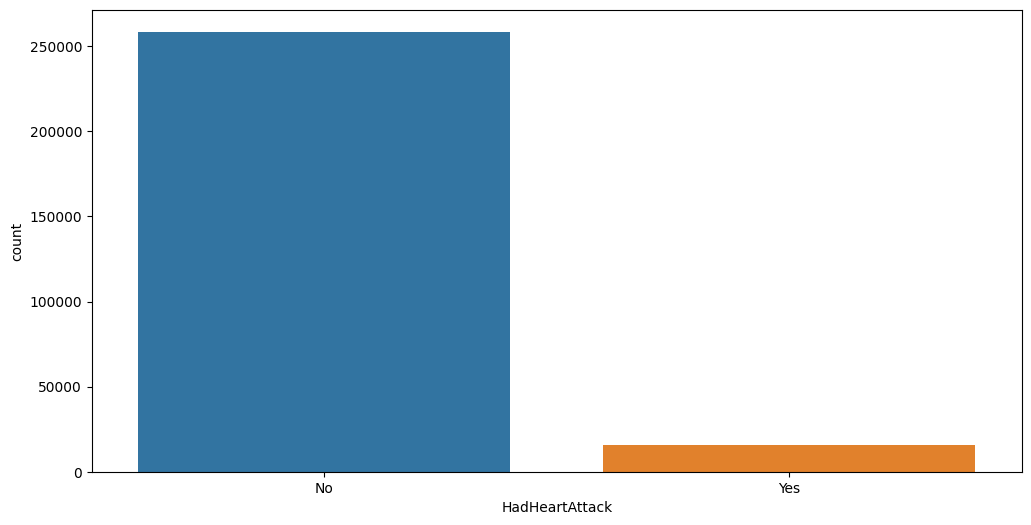

In [27]:
#총 심장병 있는사람과 없는 사람의 수
plt.figure(figsize = (12, 6))
sns.countplot(x = 'HadHeartAttack', data = df)

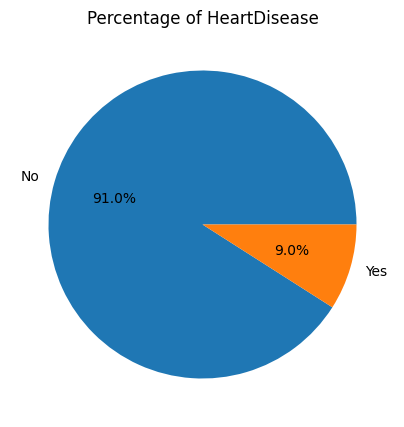

In [28]:
#심장병 있는사람과 없는 사람의 확률
value_c = df['HeartDisease'].value_counts()
labels = ['No', 'Yes']

plt.figure(figsize=(5,5))
plt.pie(value_c, labels=labels, autopct='%1.1f%%', startangle=0)
plt.title('Percentage of HeartDisease')
plt.show()

In [29]:

numeric_cols=[]
category_cols=[]
for col in df.columns:
    if df[col].dtype=='object':
        category_cols.append(col)
    else:
        numeric_cols.append(col)

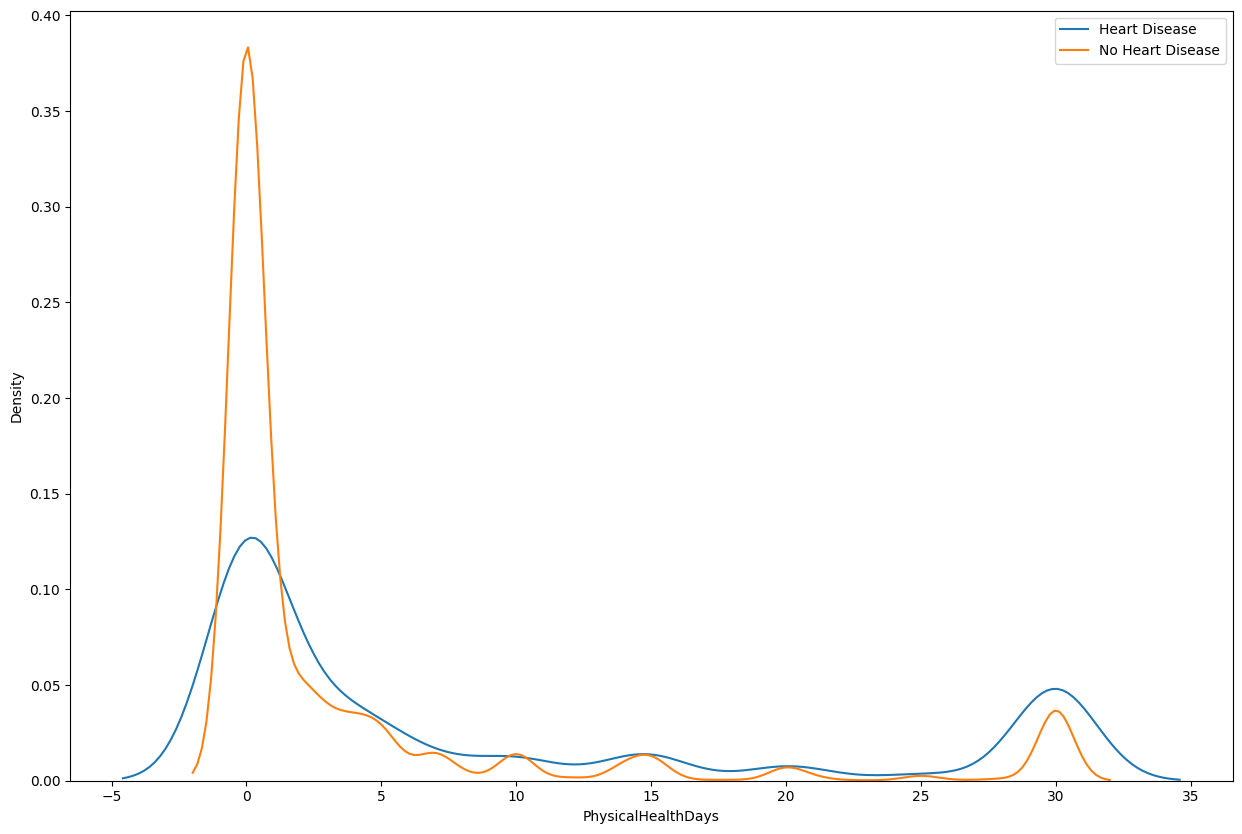

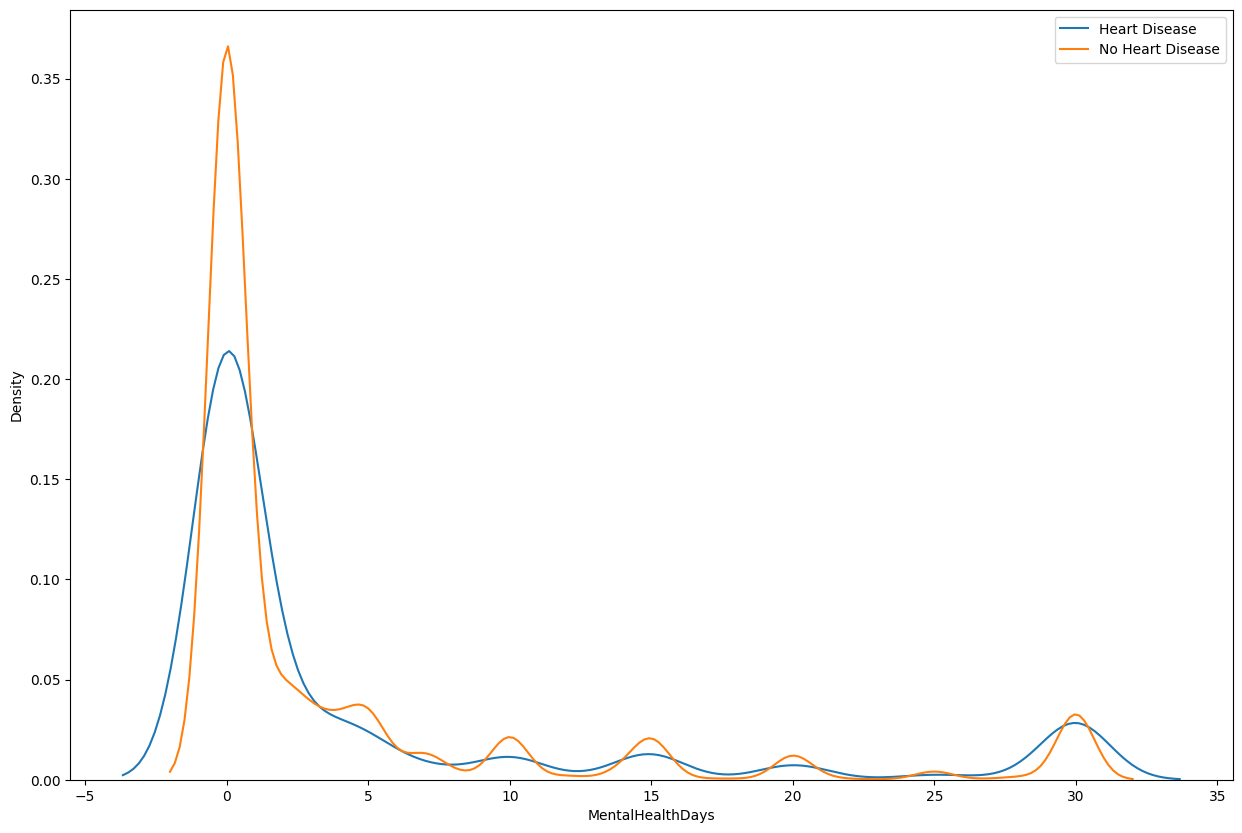

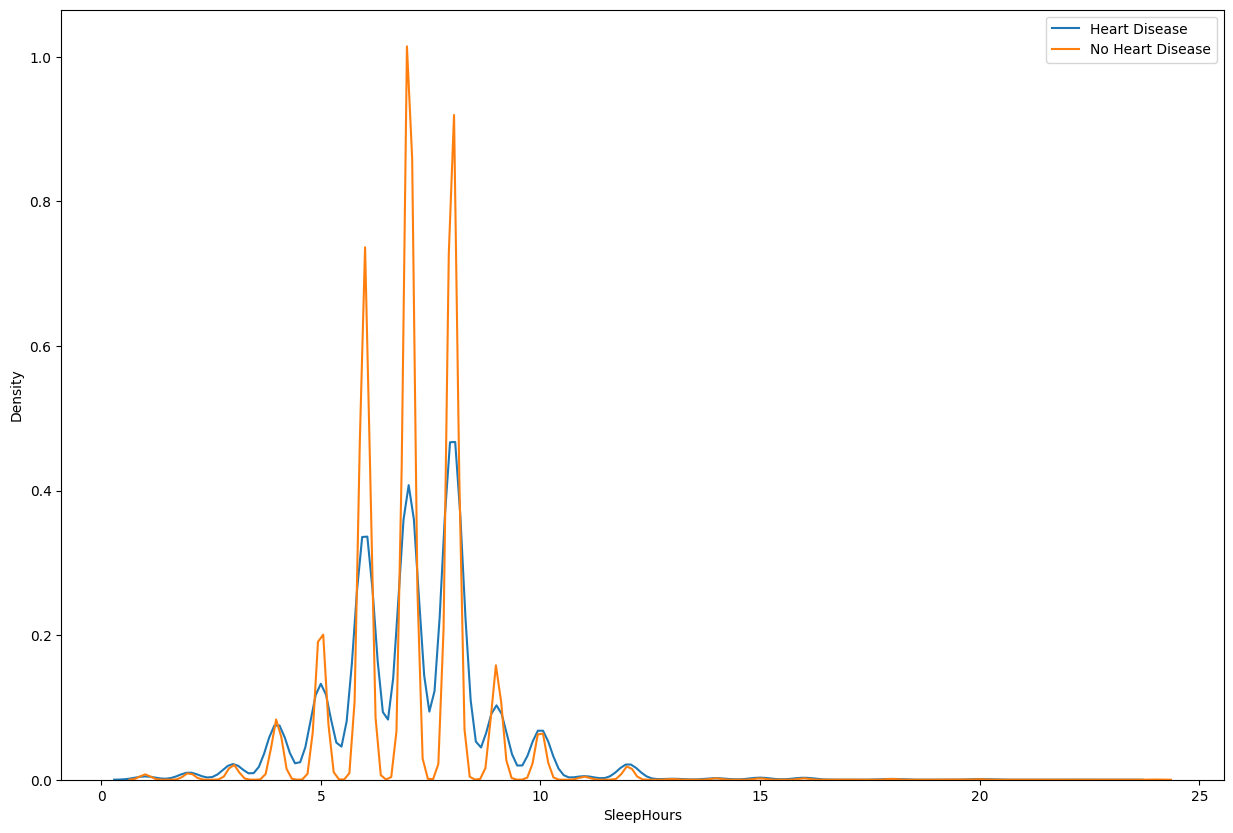

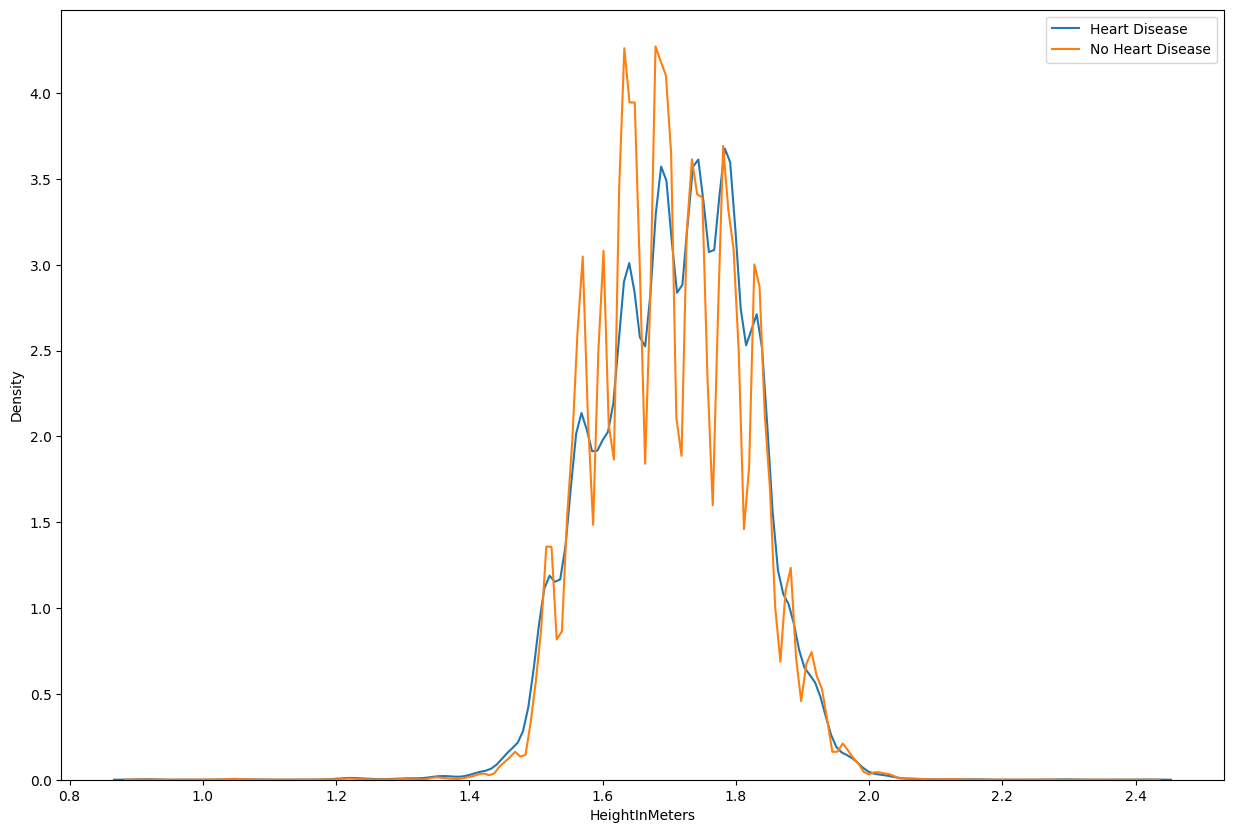

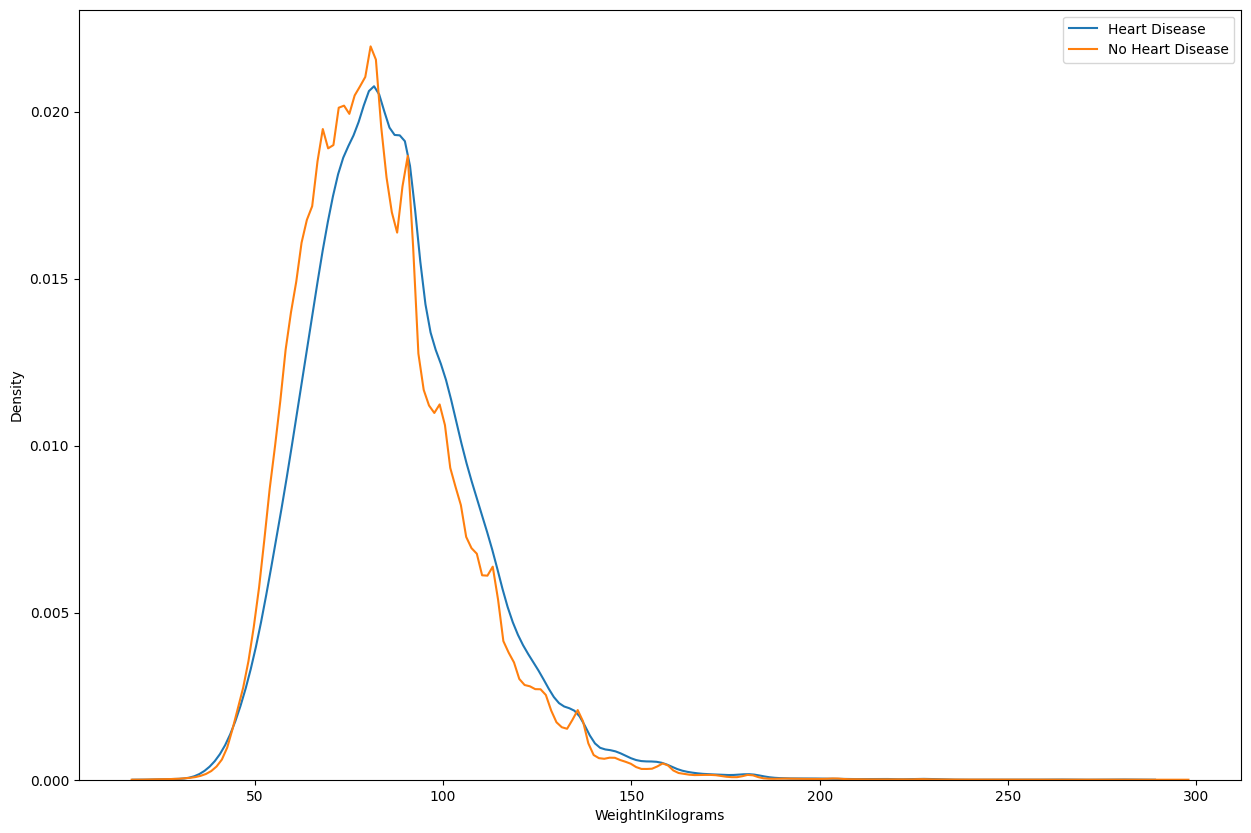

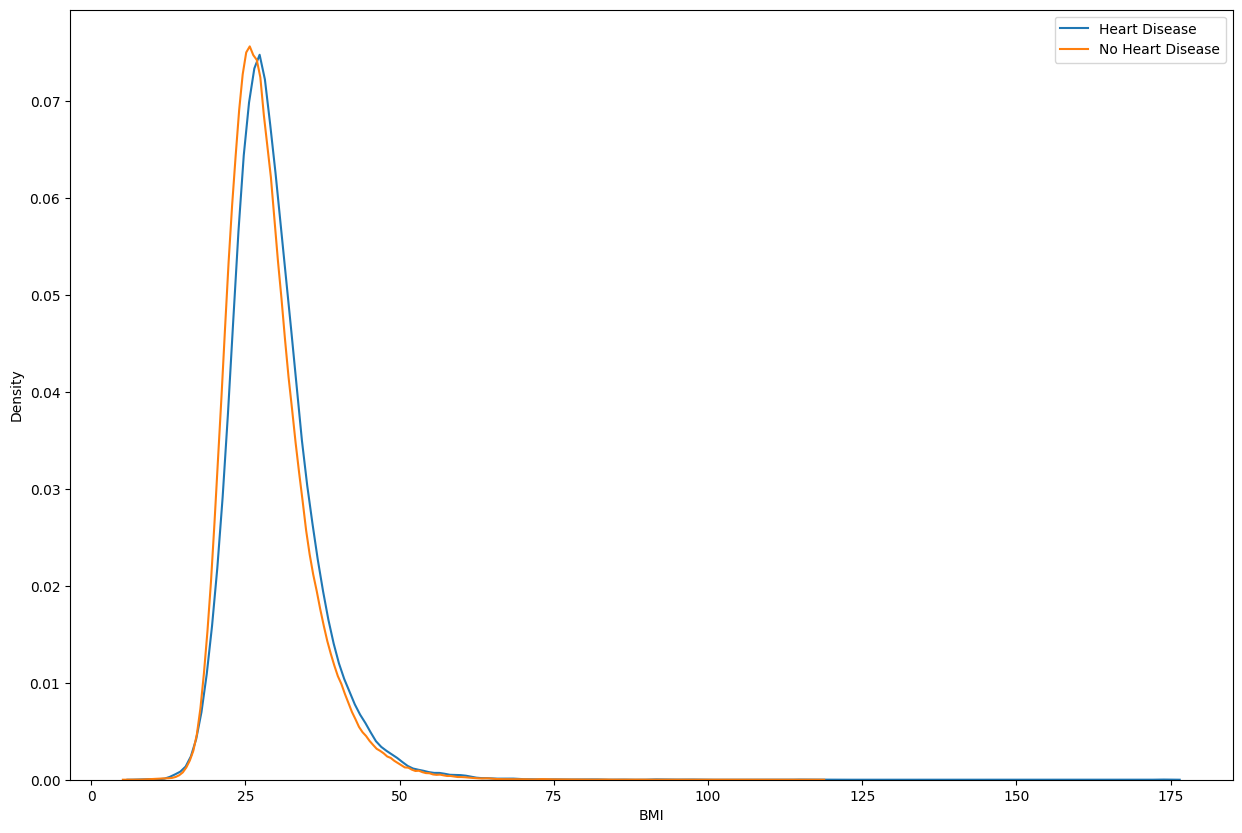

In [30]:
#전체적인 이미 숫자로 만들어진 부분들 그래프 보기
for col in numeric_cols[:-1]:
    f,ax=plt.subplots(1,figsize=(15,10))
    sns.kdeplot(df[df['HeartDisease']==1][col],ax=ax)
    sns.kdeplot(df[df['HeartDisease']==0][col],ax=ax)
    plt.legend(labels=['Heart Disease', 'No Heart Disease'])

C:\Users\goqls\AppData\Local\Temp\ipykernel_25552\3829720474.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (20,6))


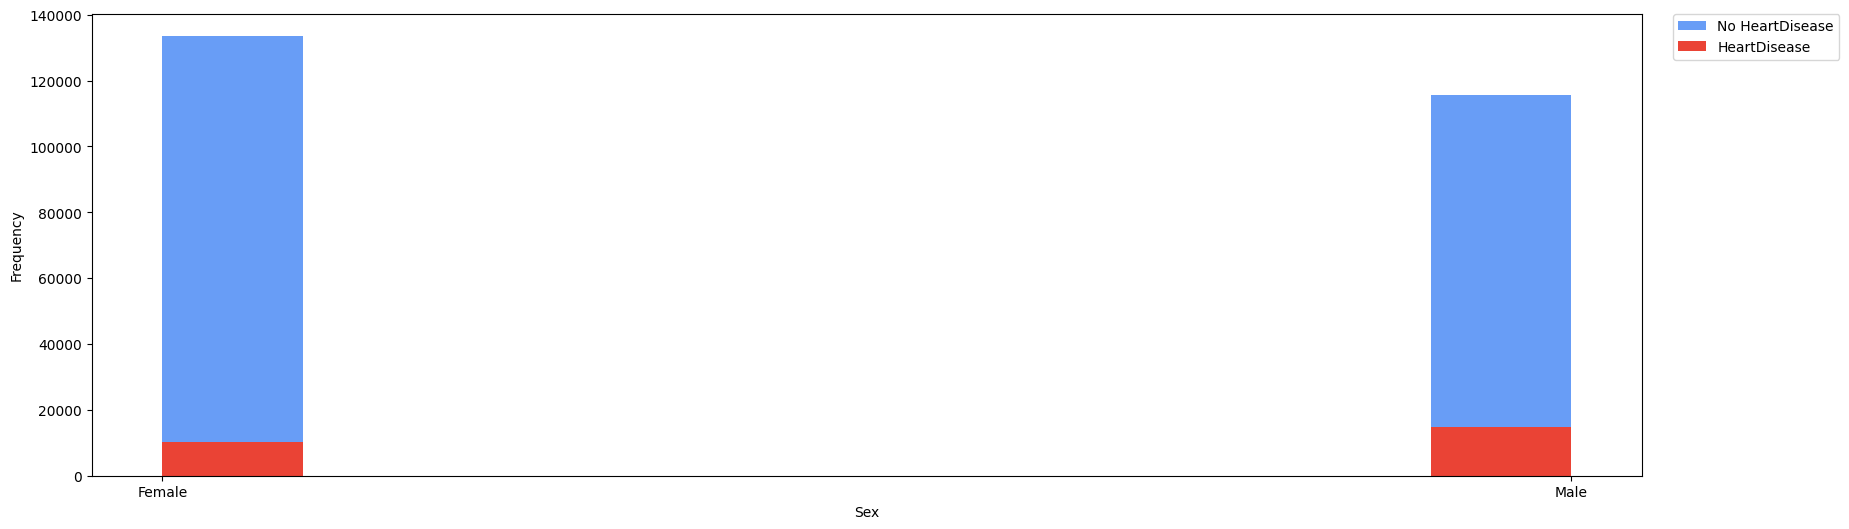

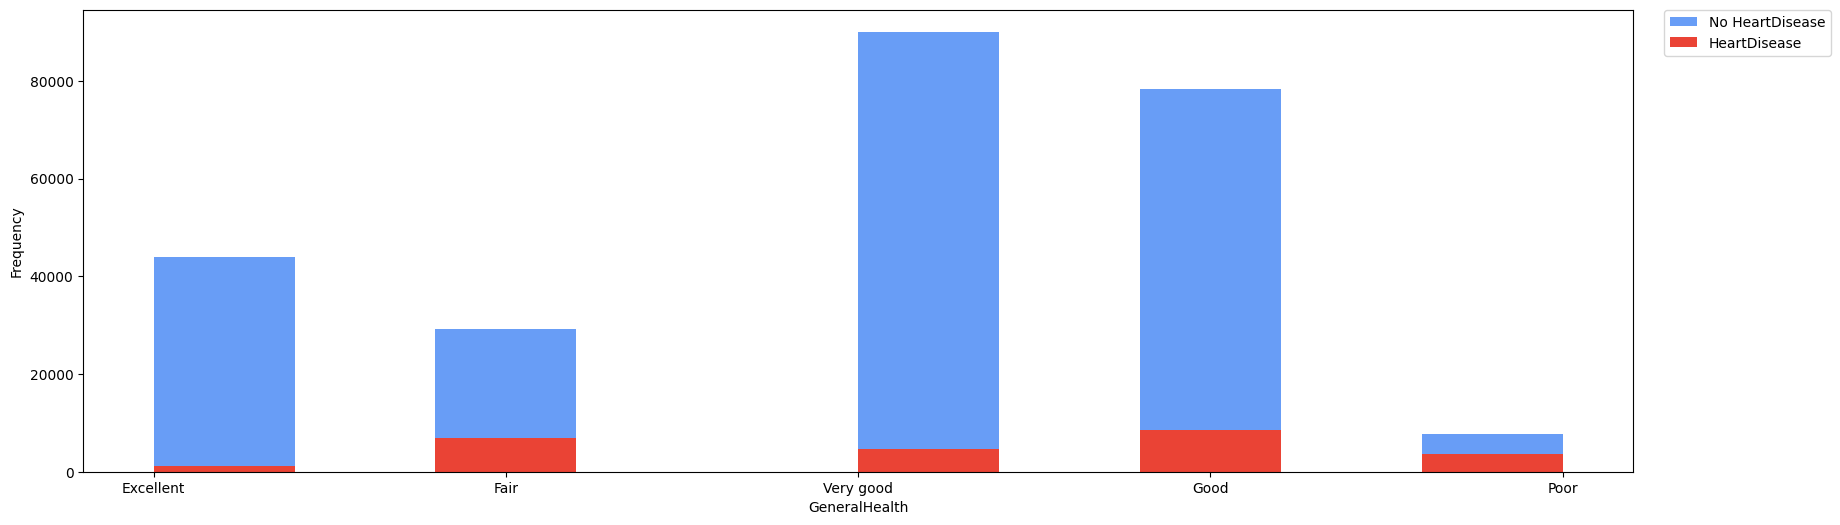

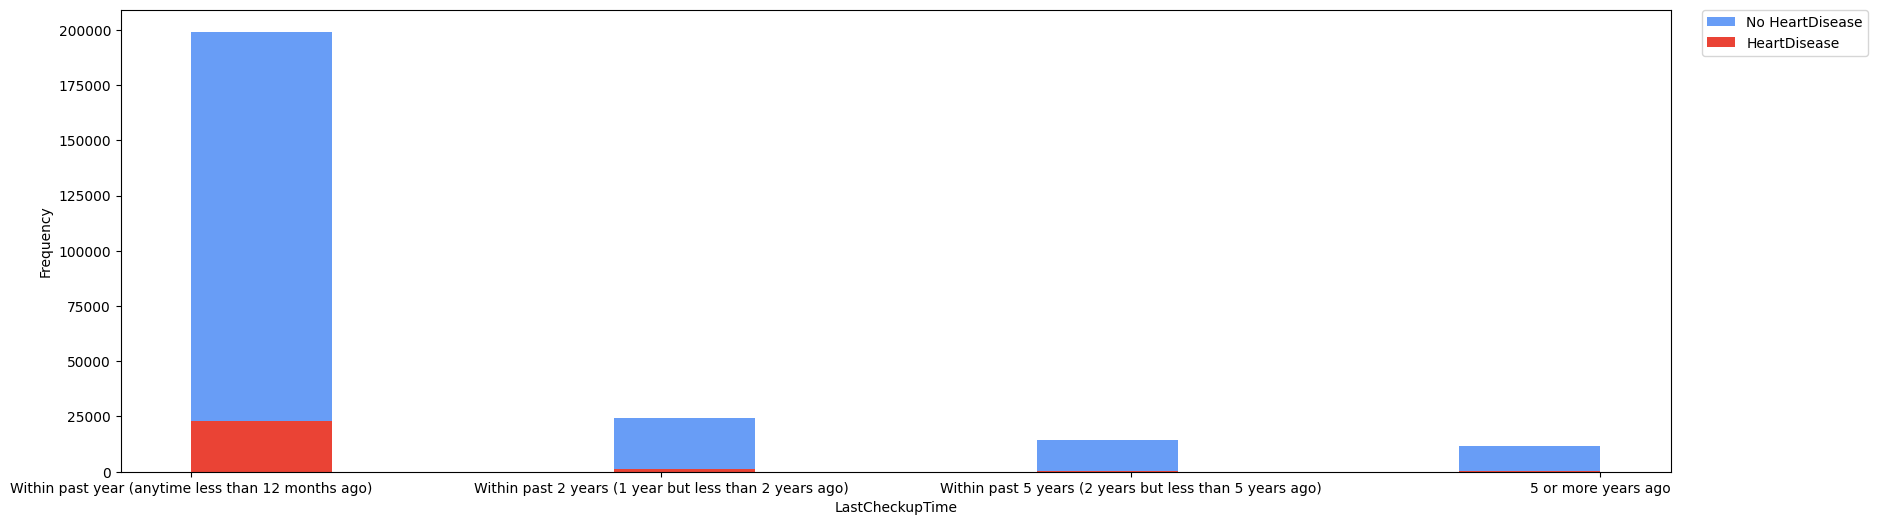

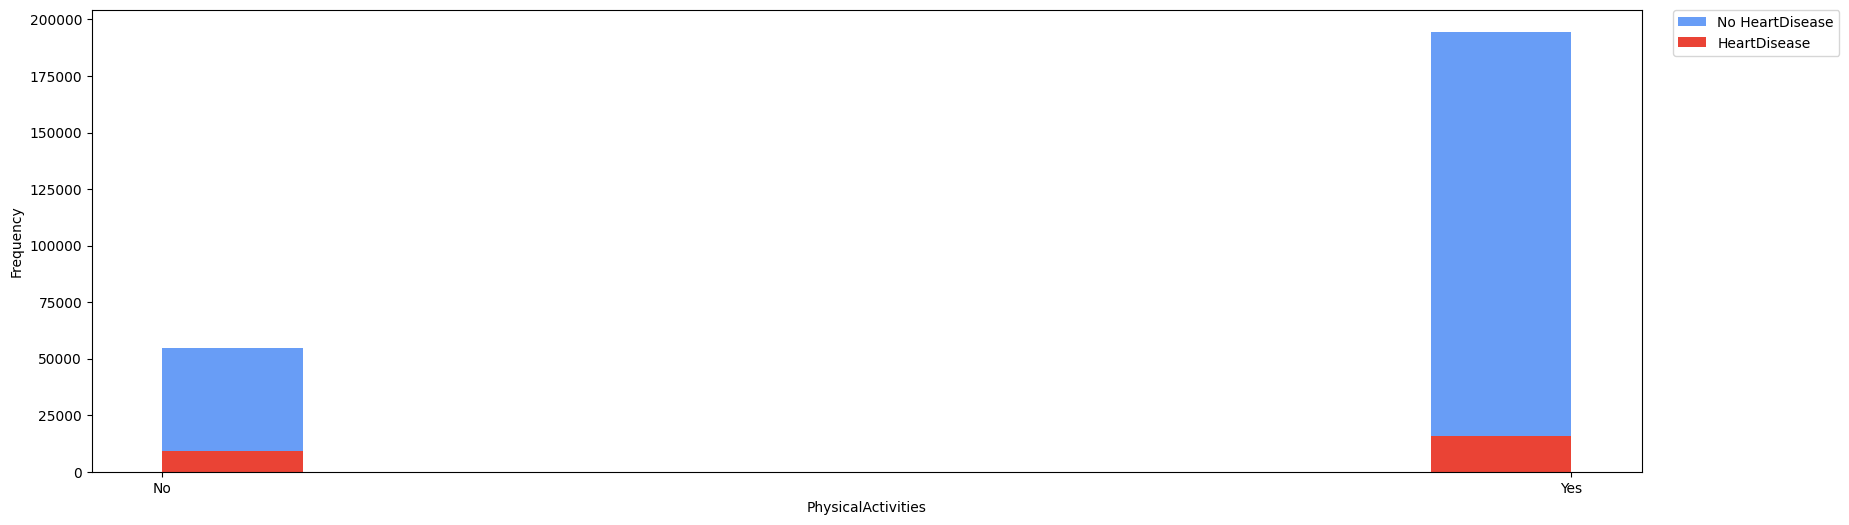

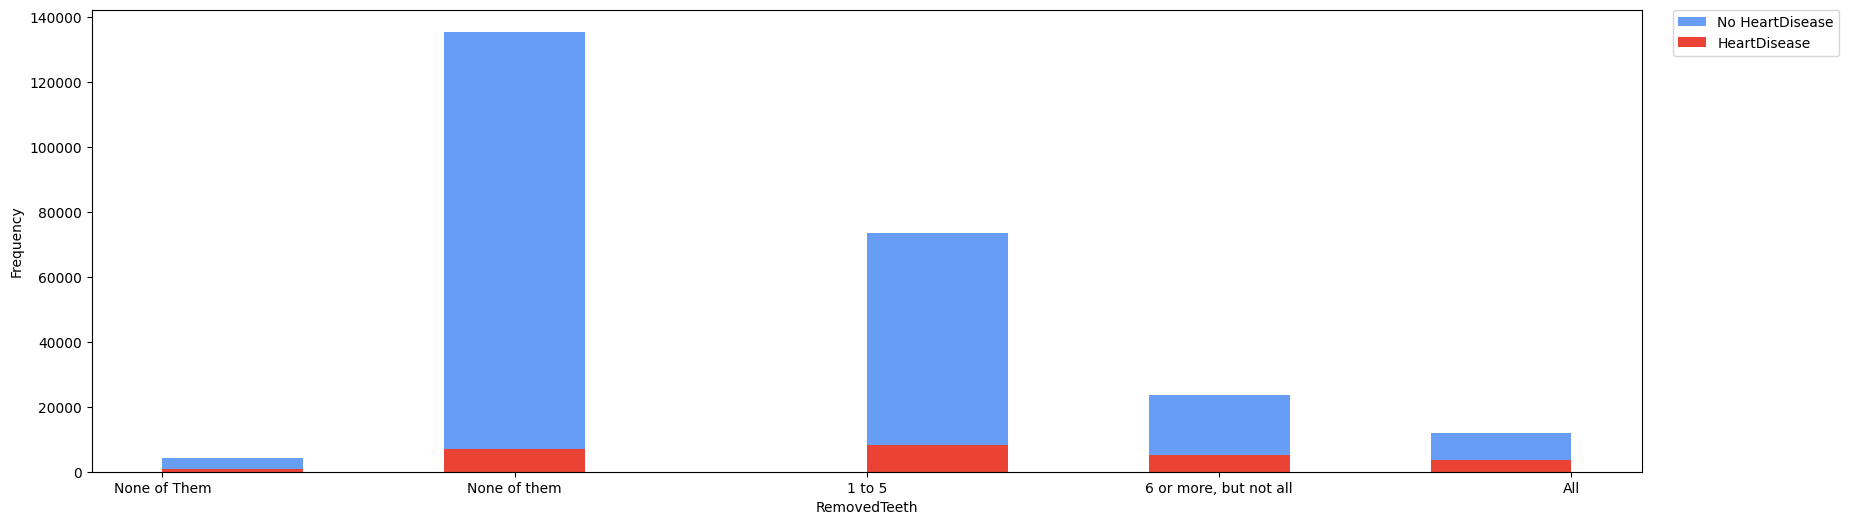

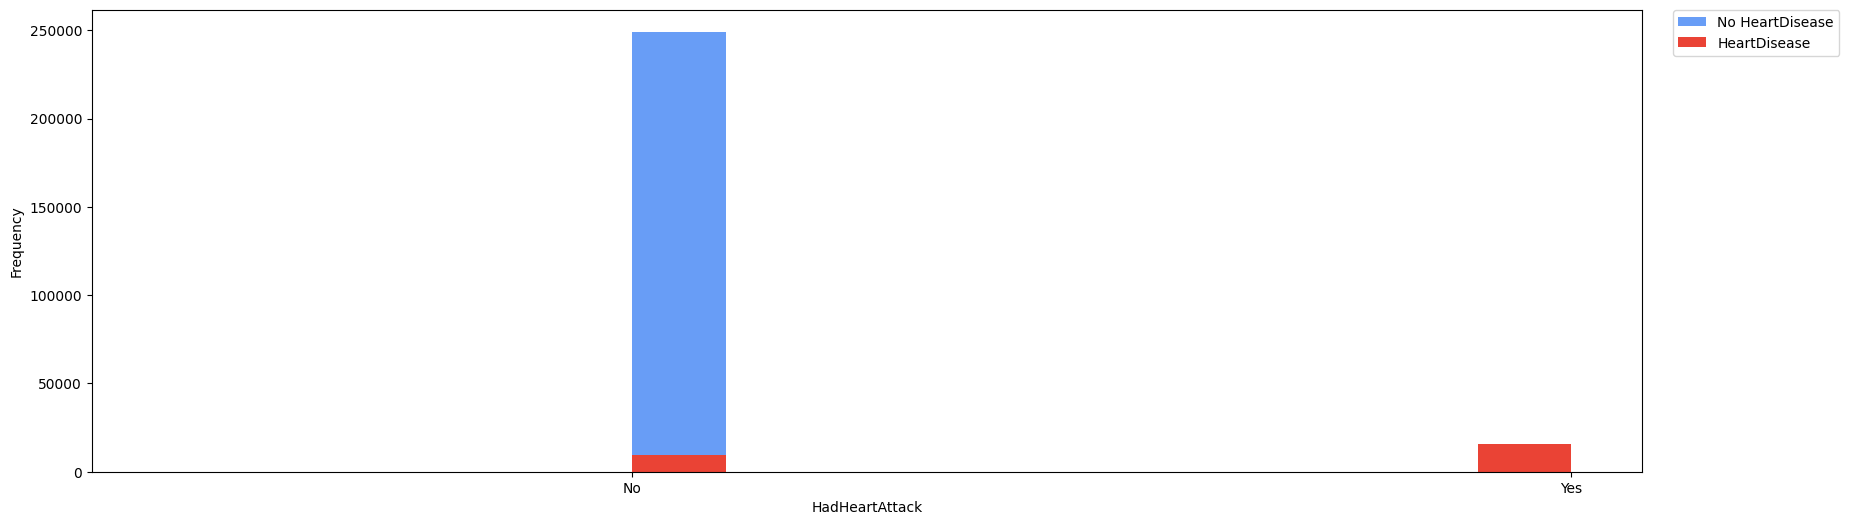

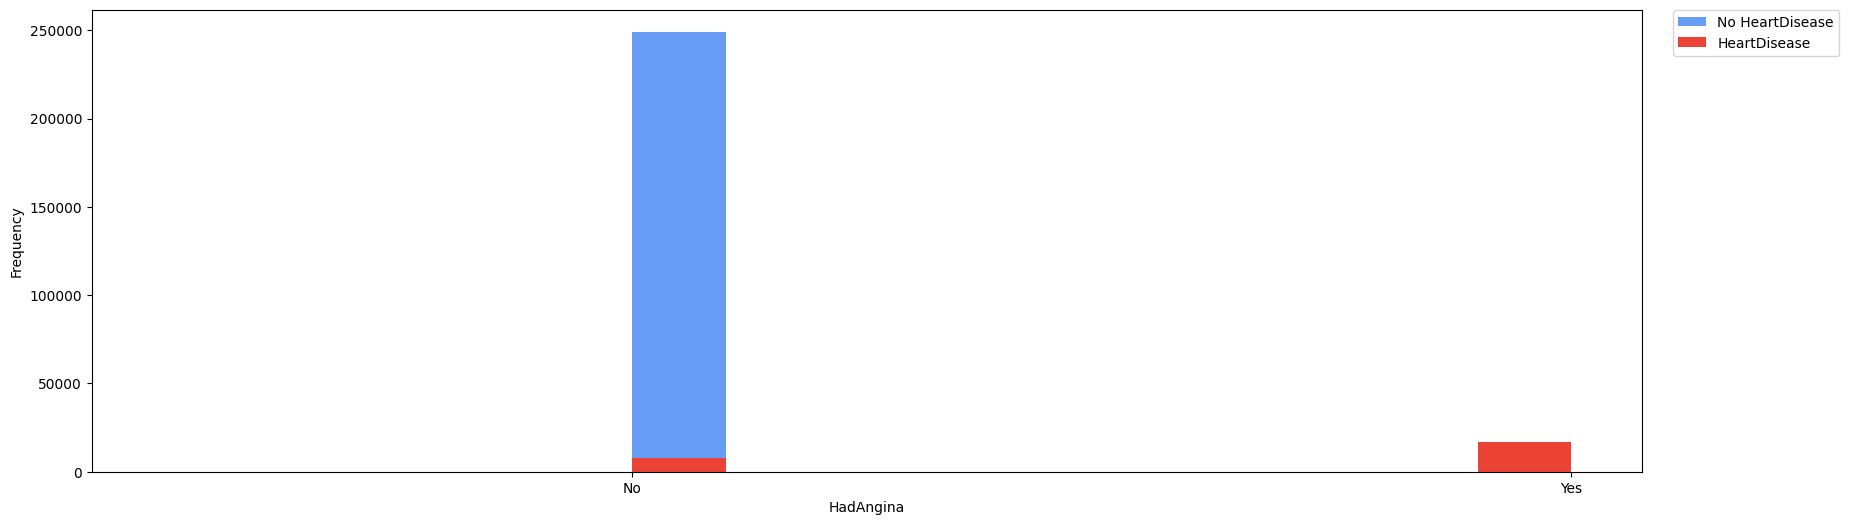

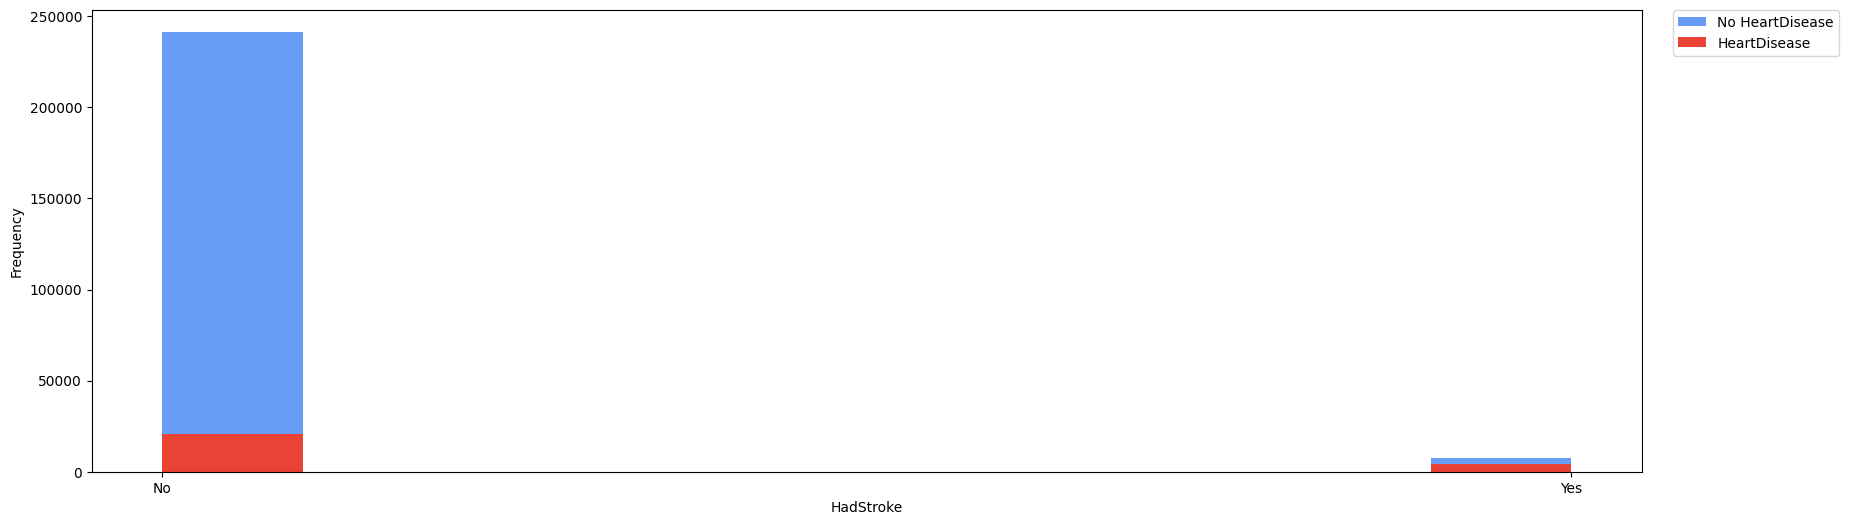

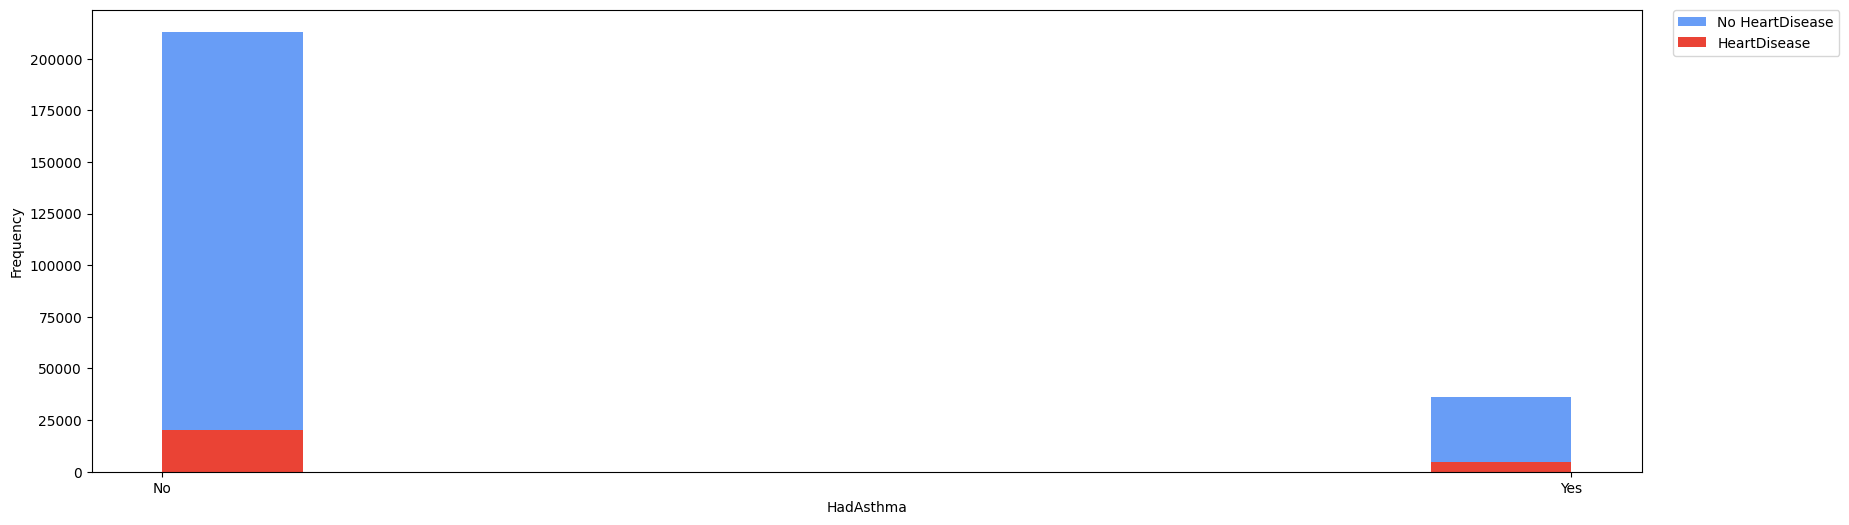

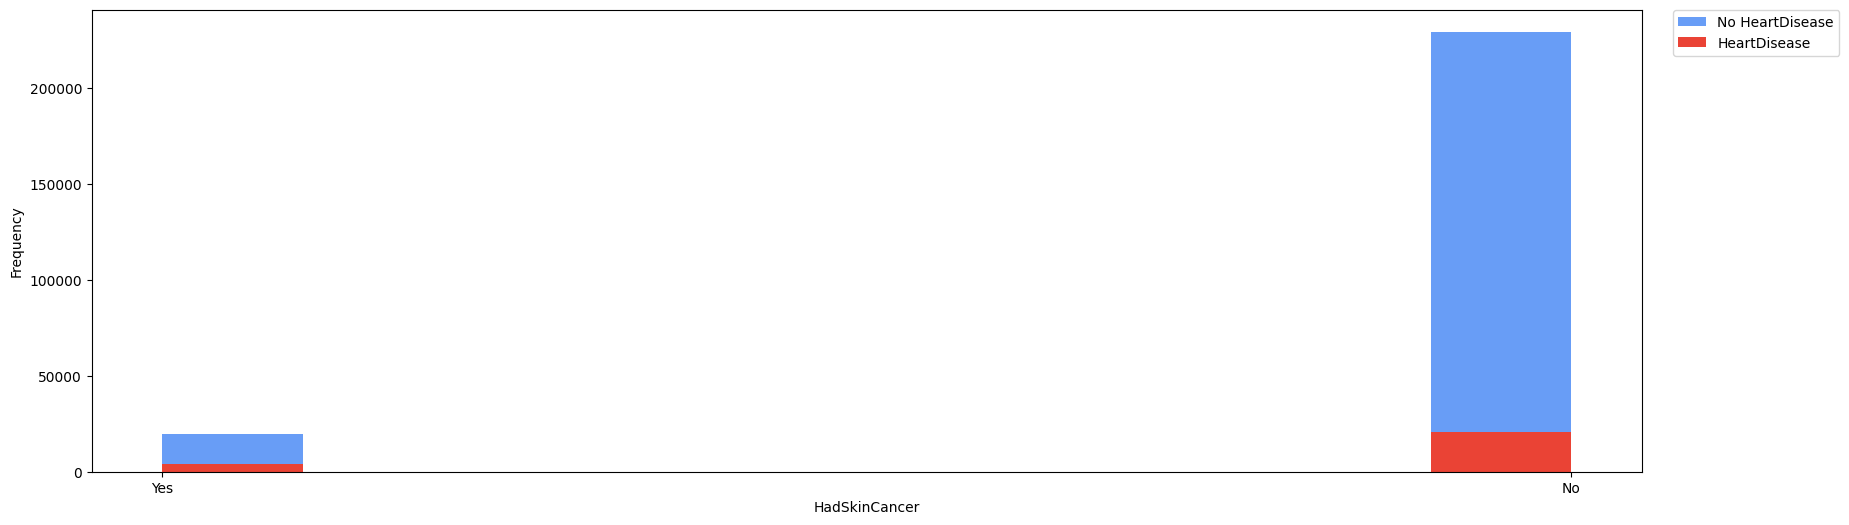

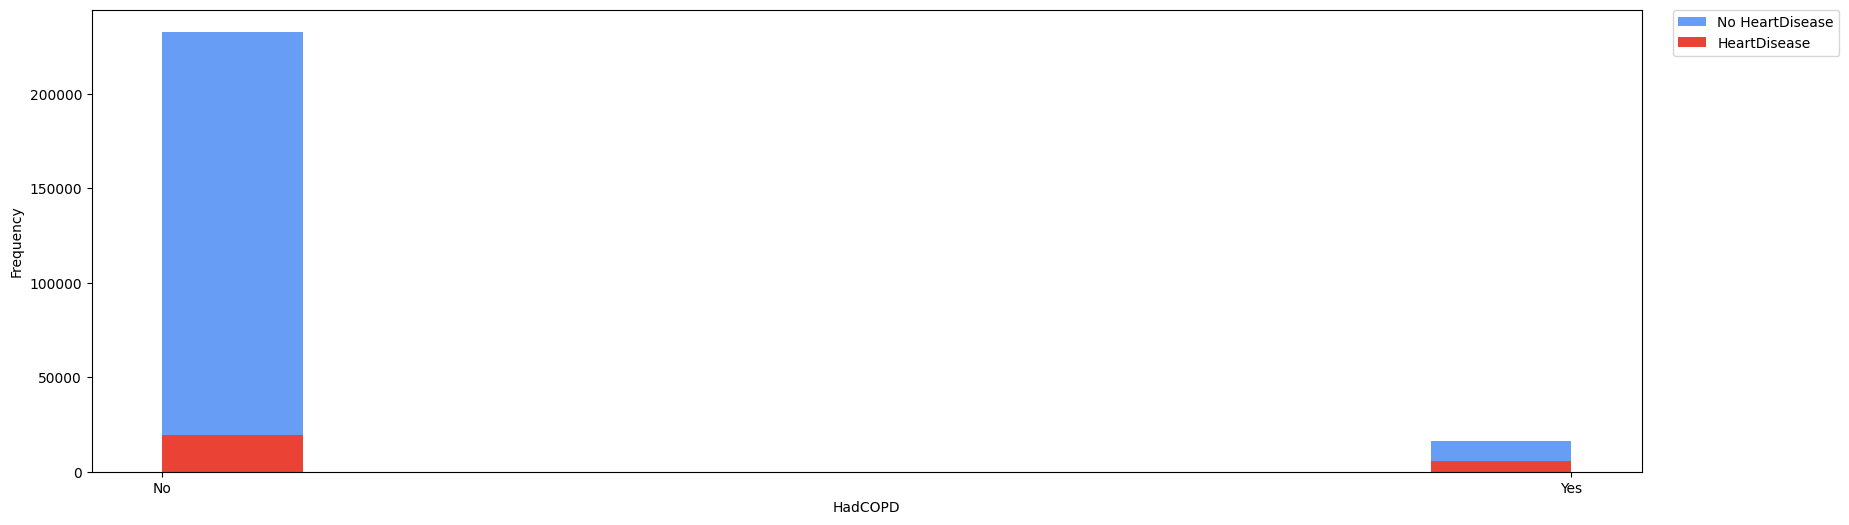

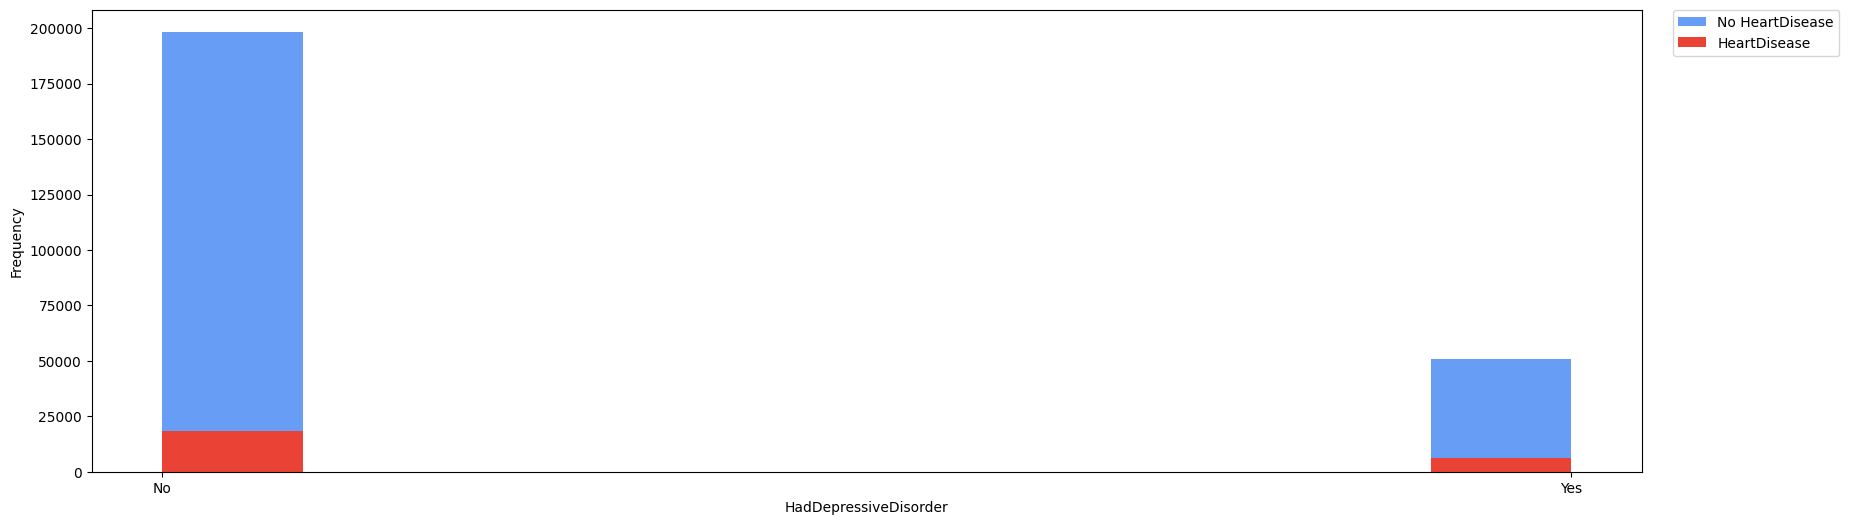

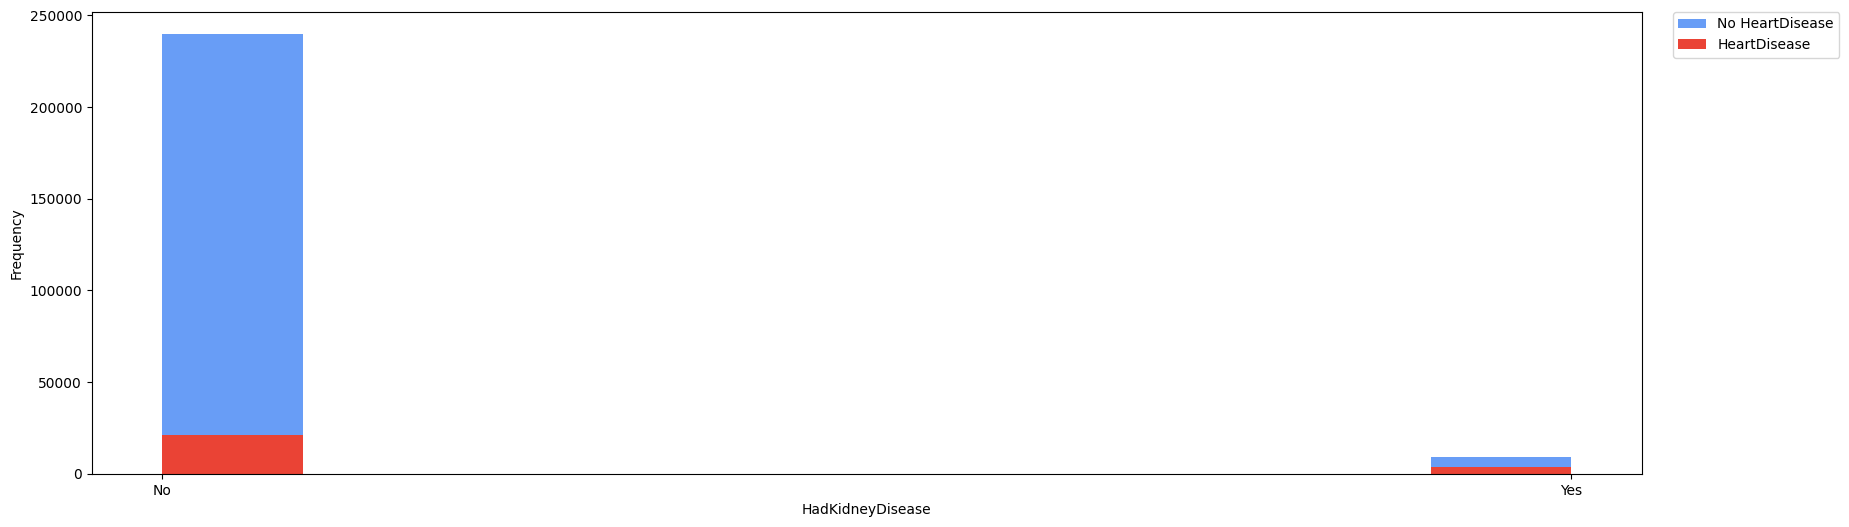

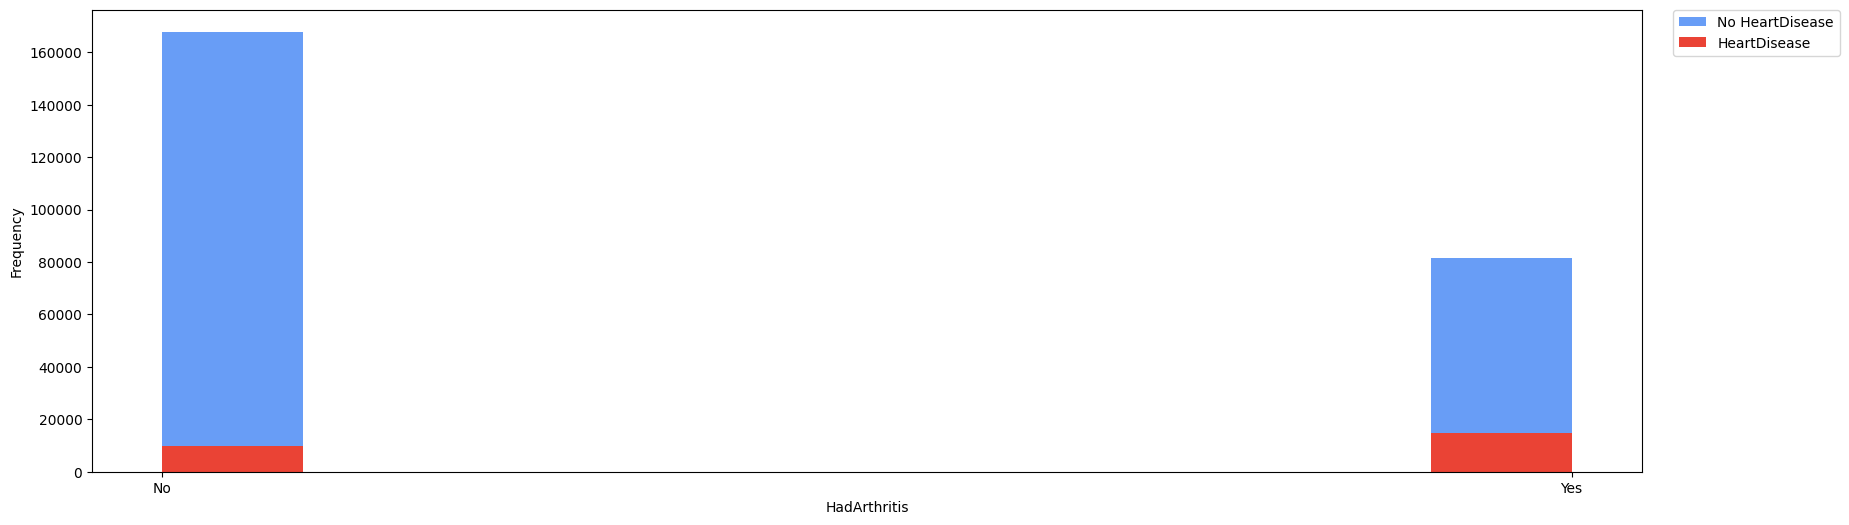

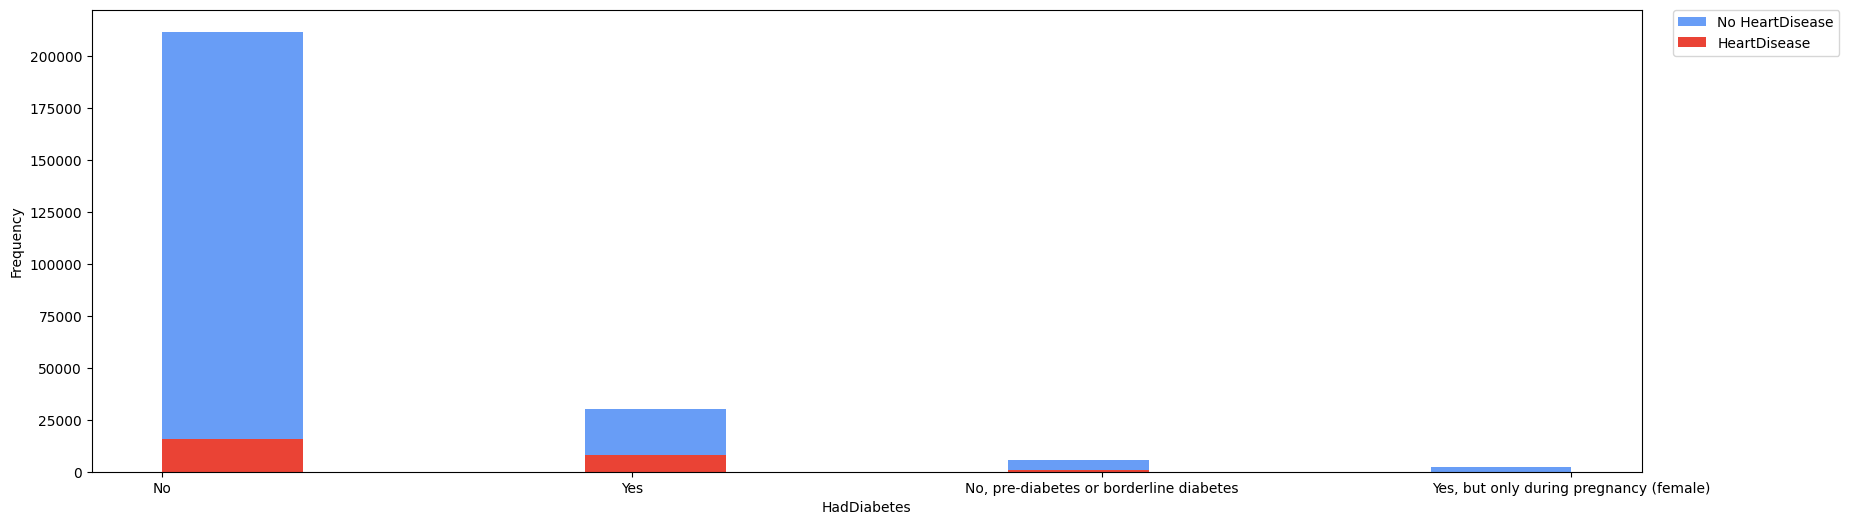

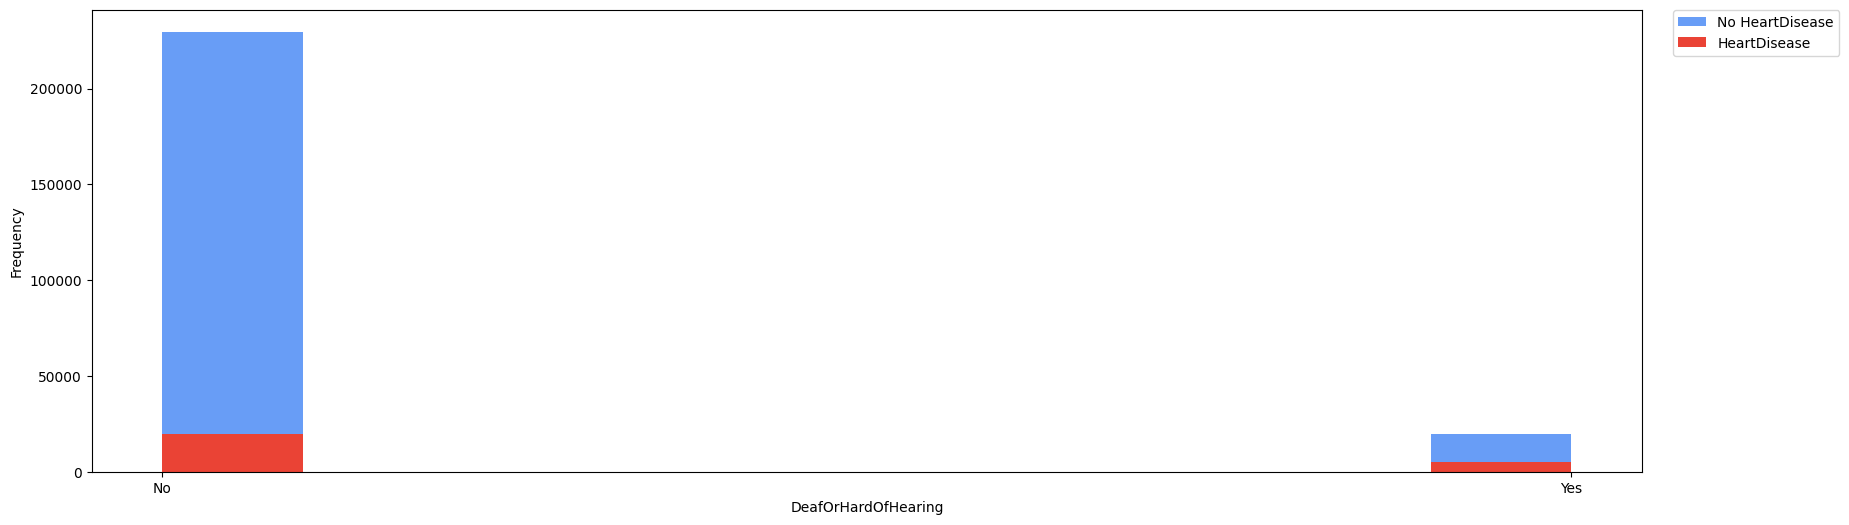

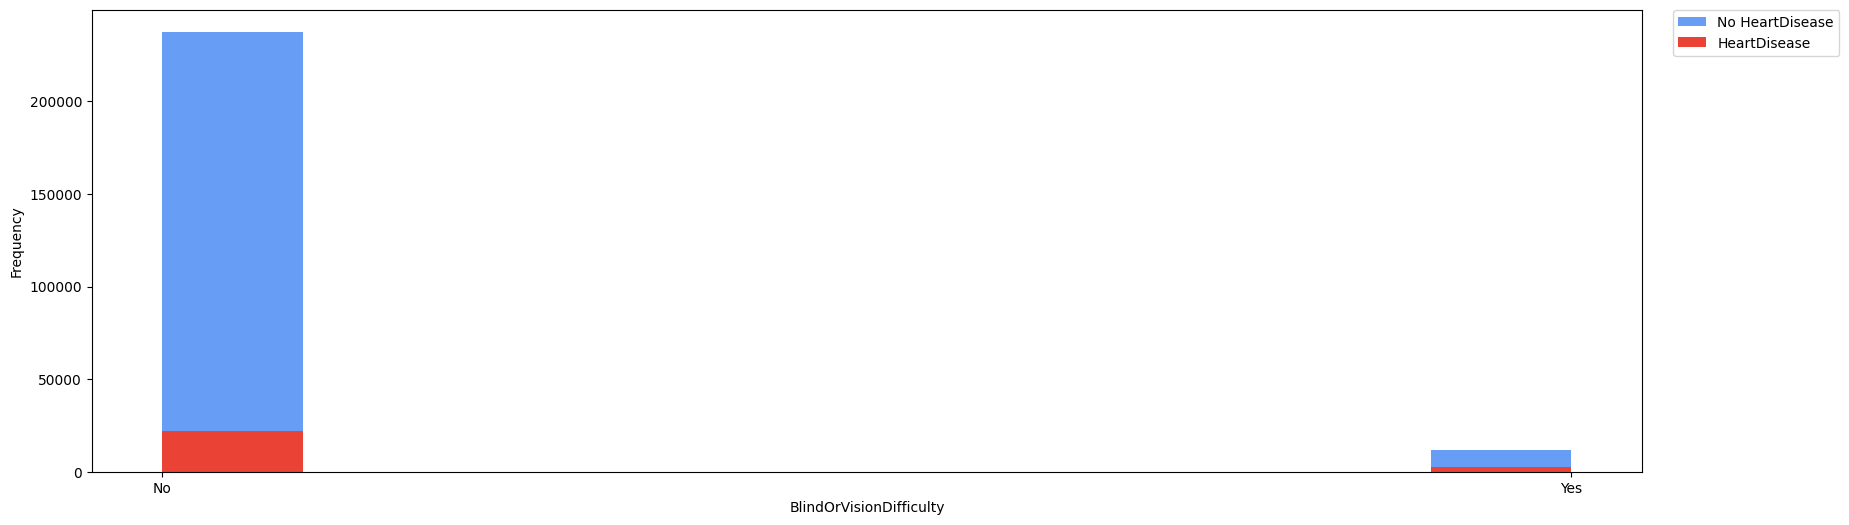

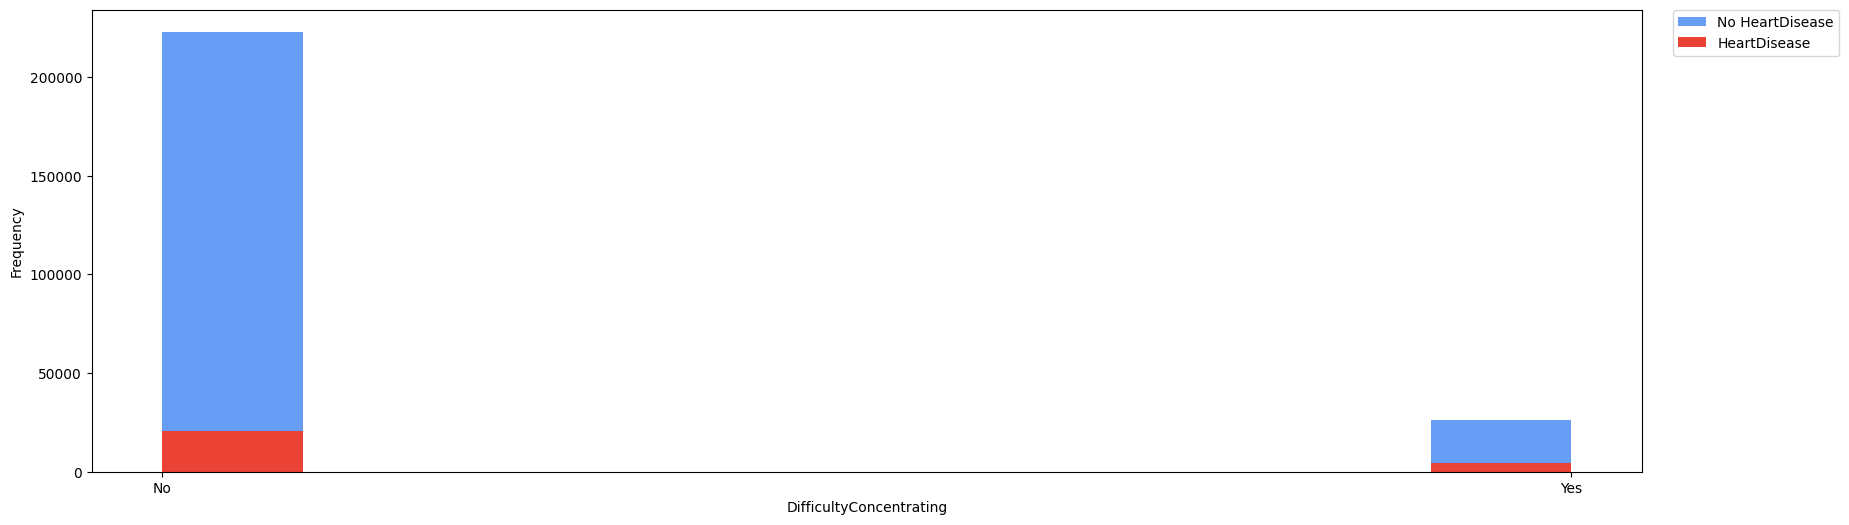

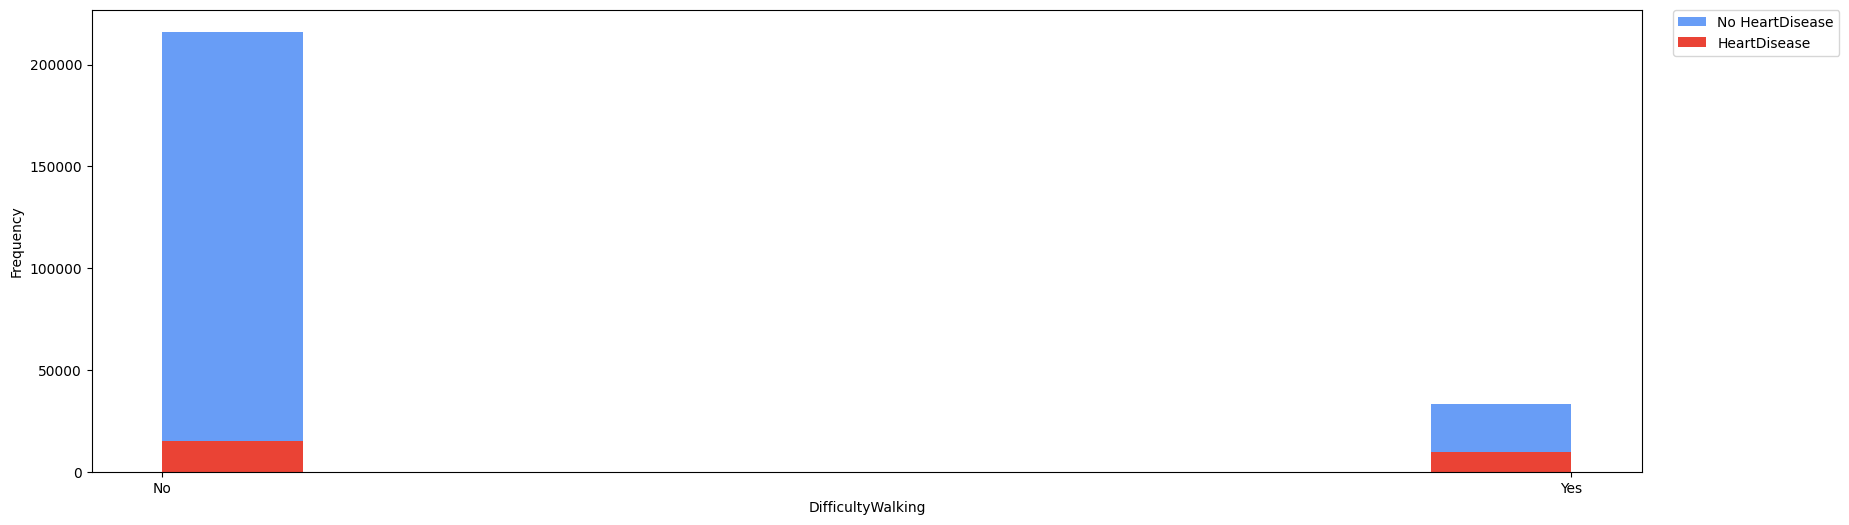

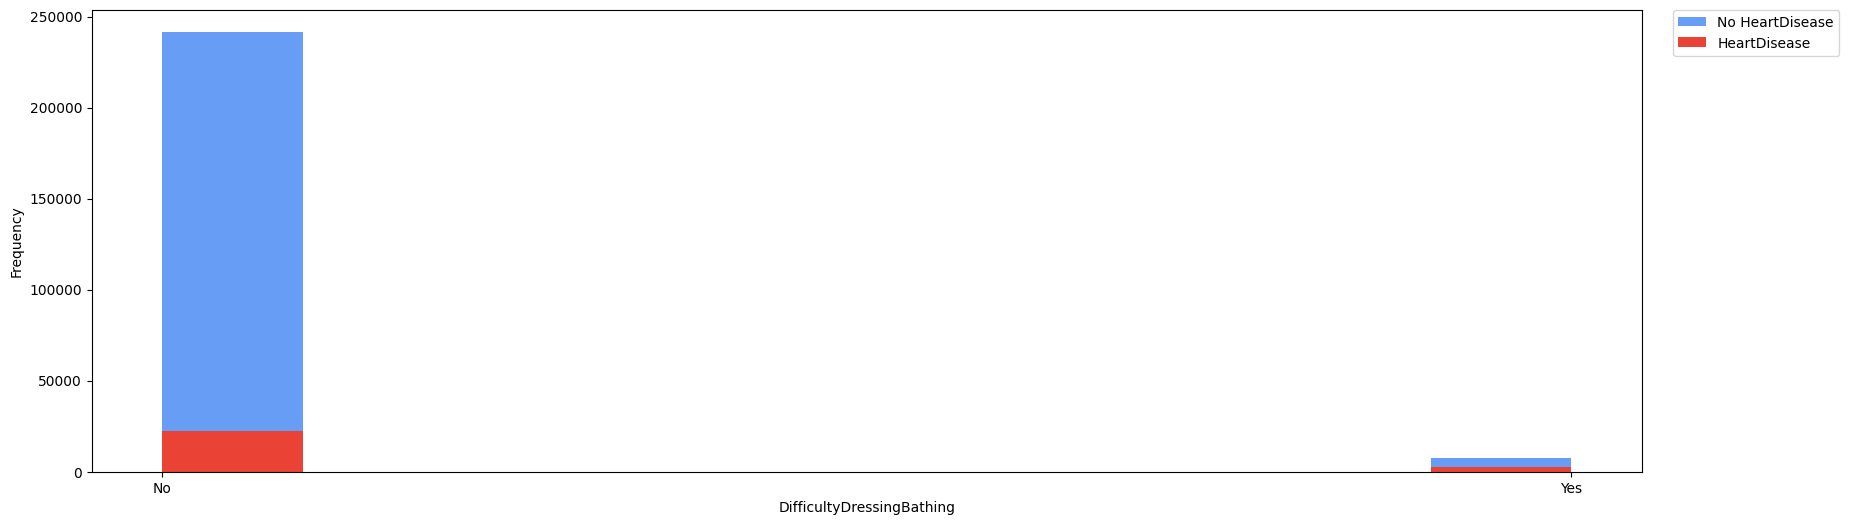

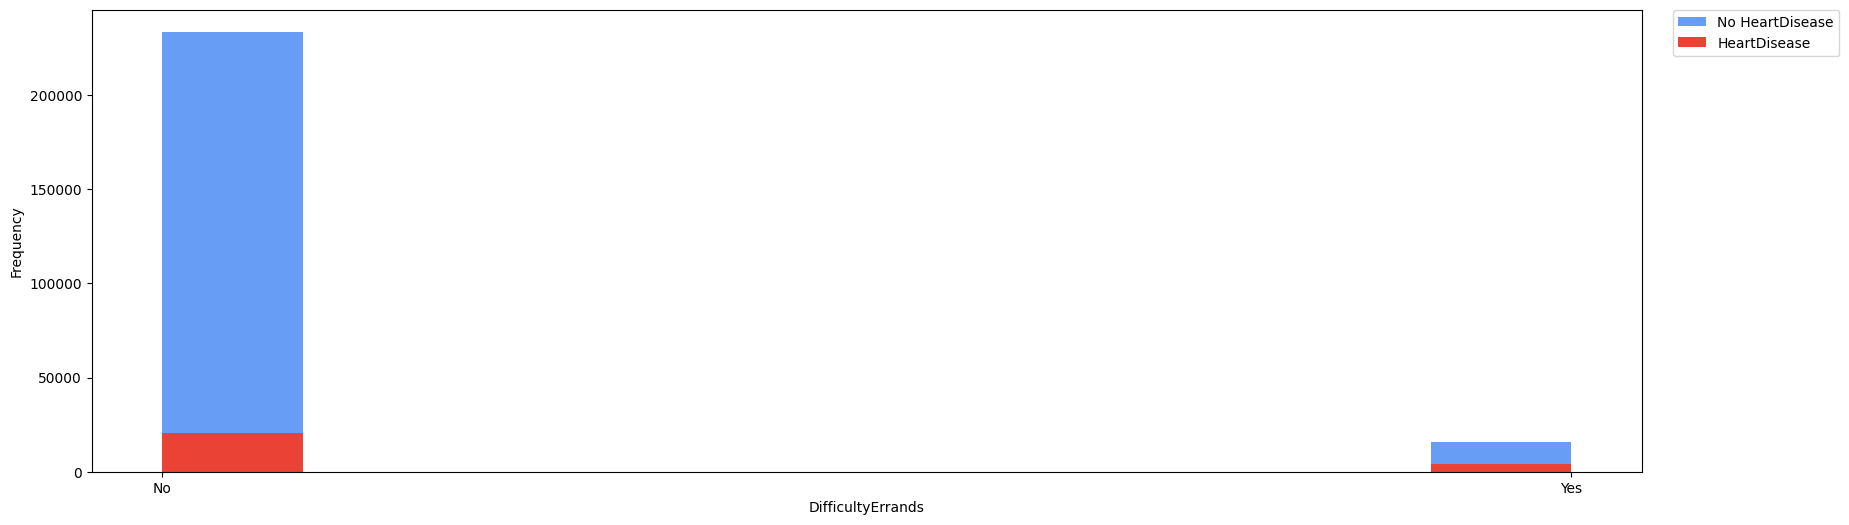

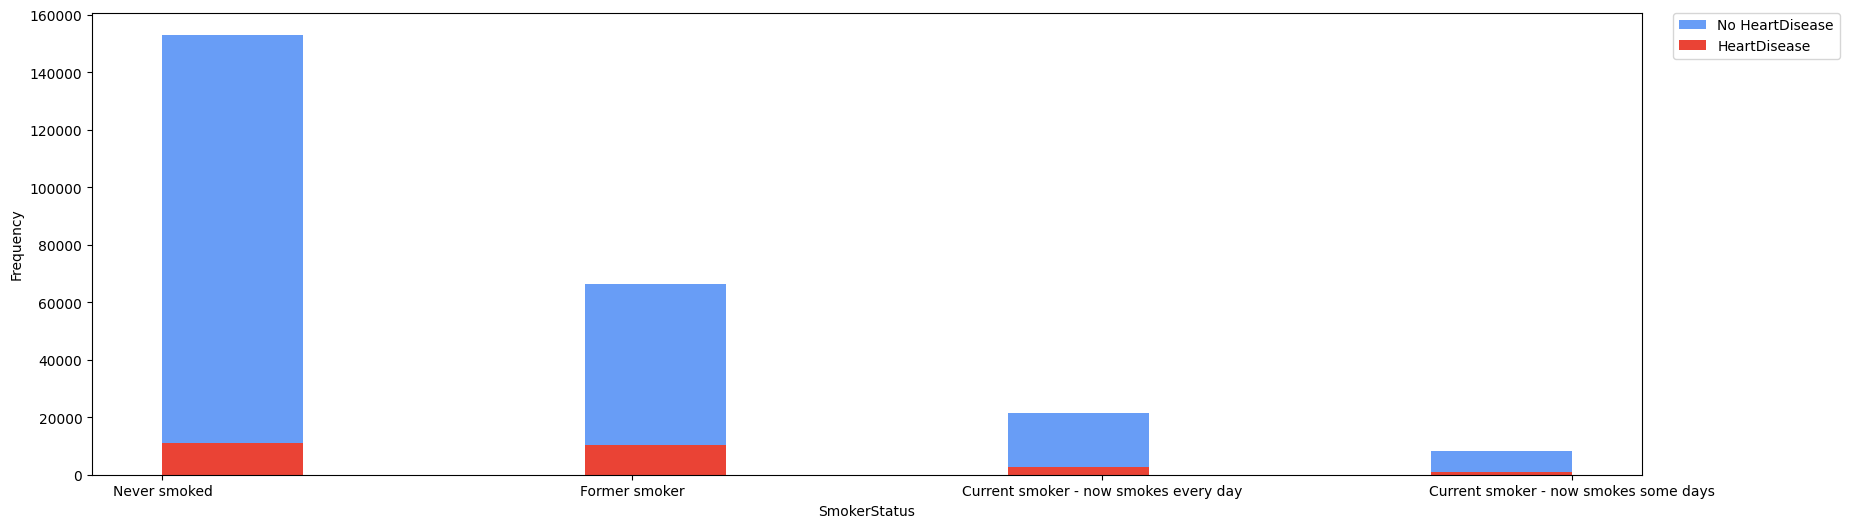

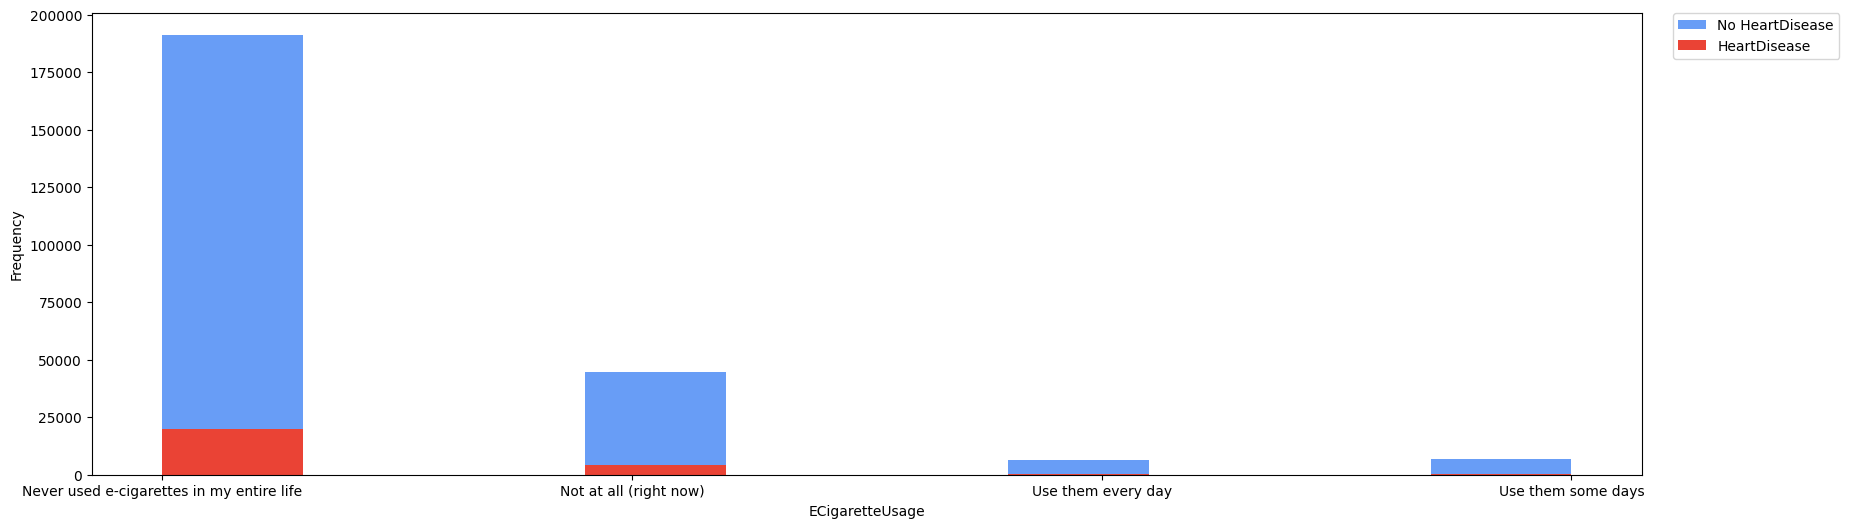

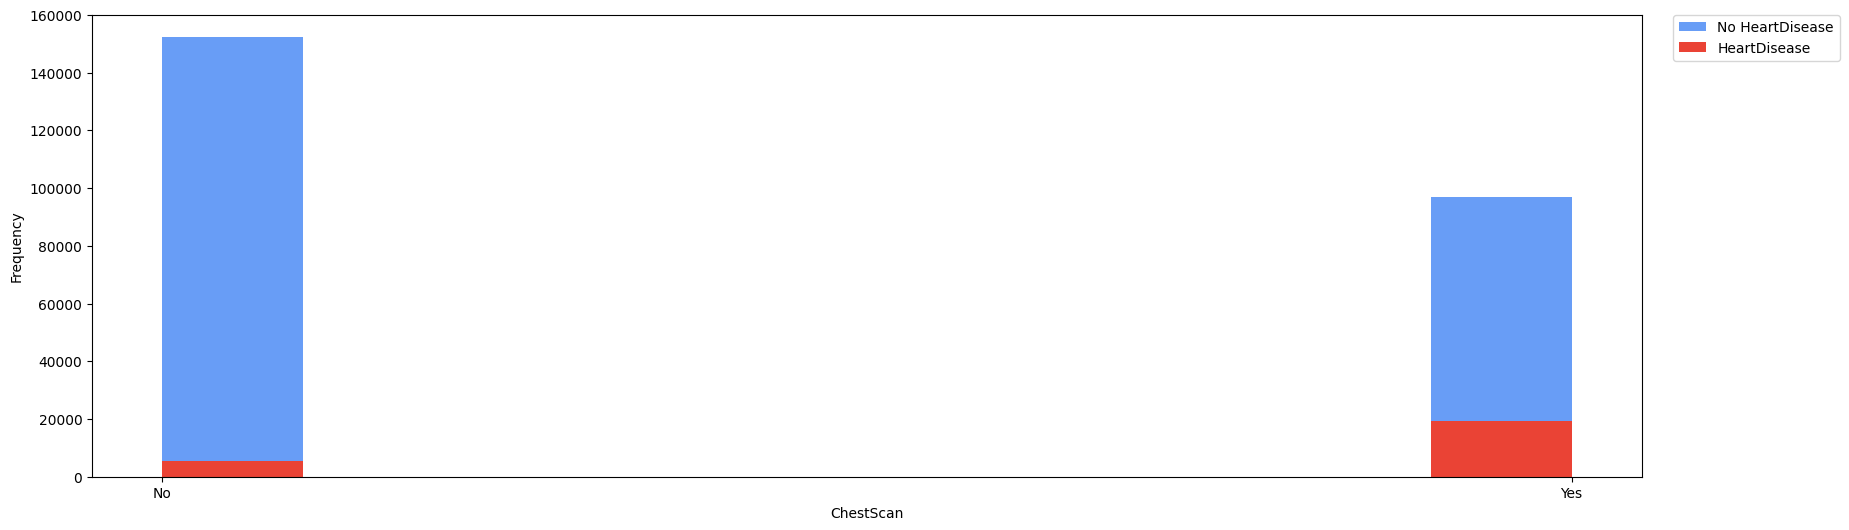

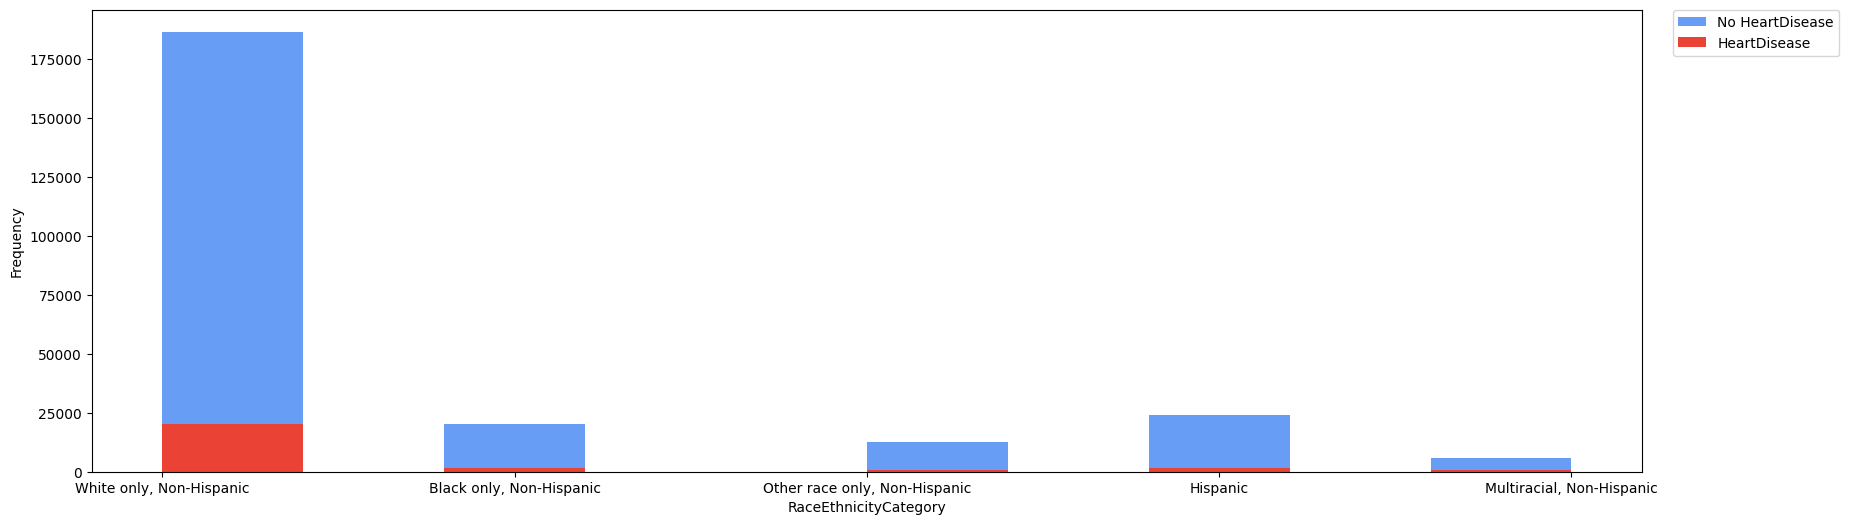

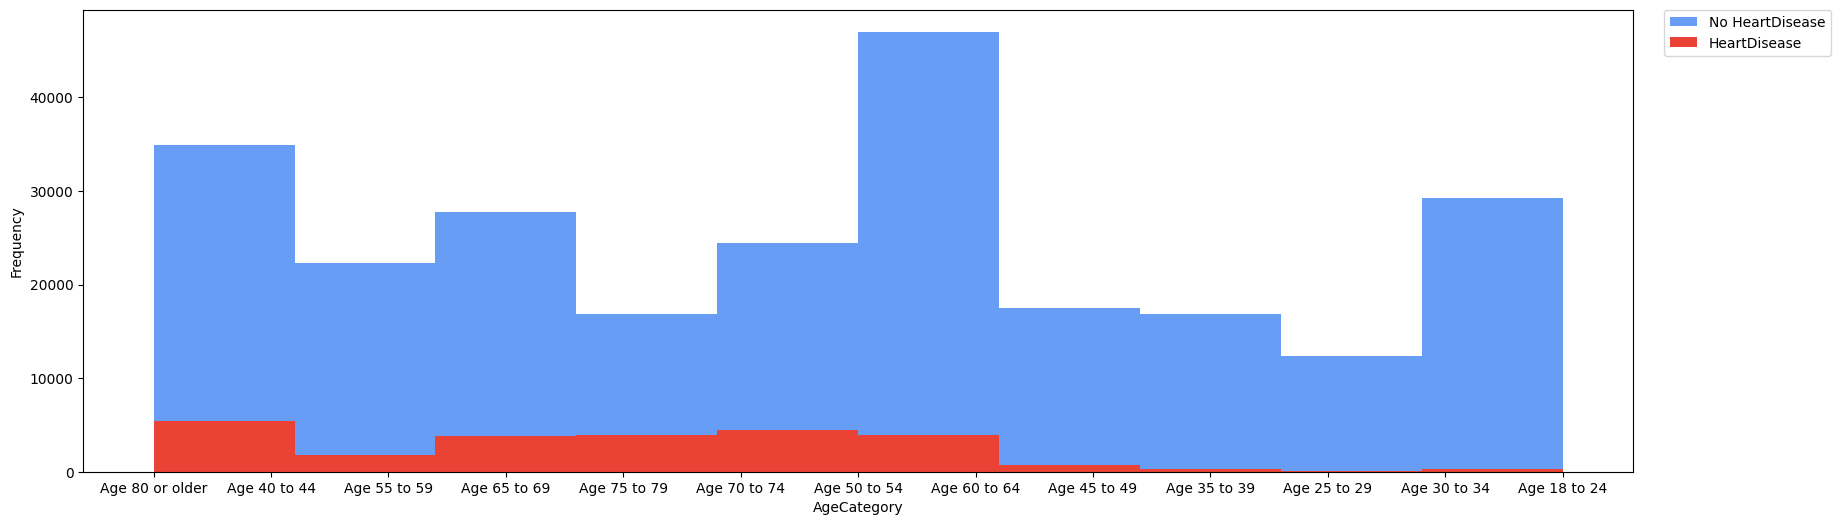

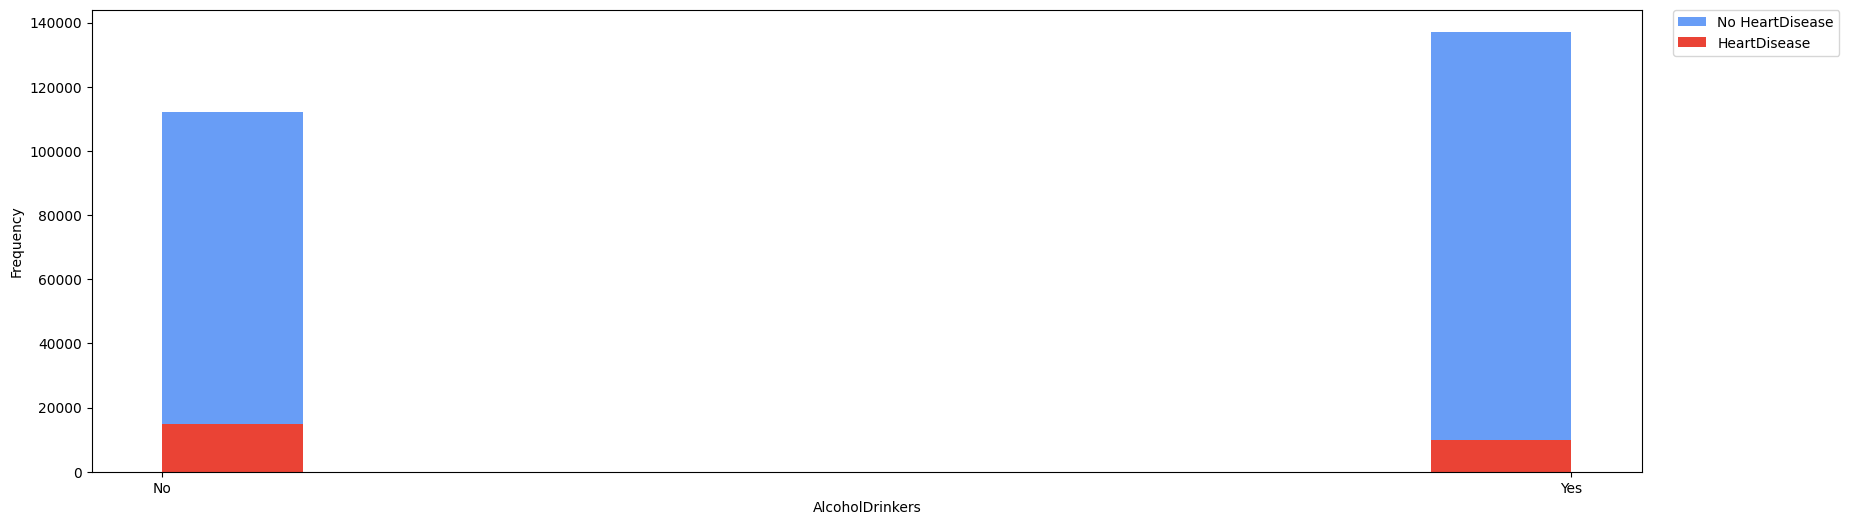

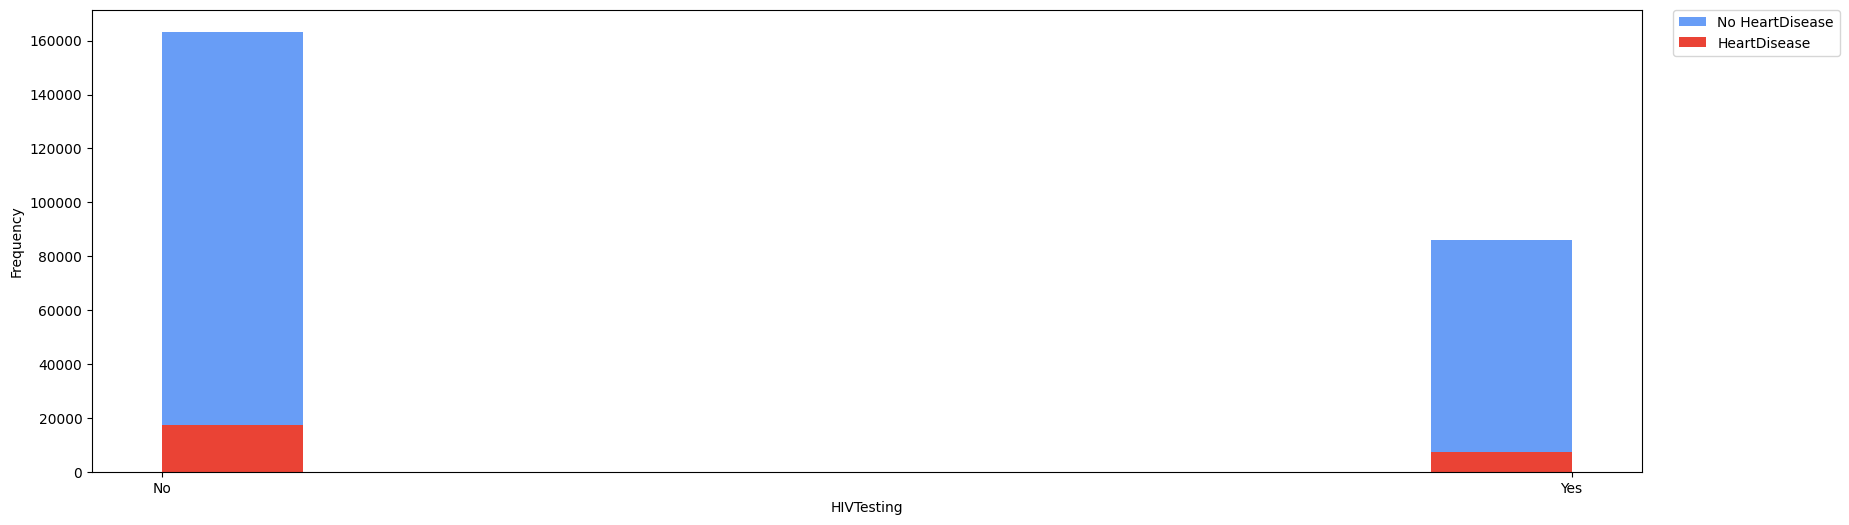

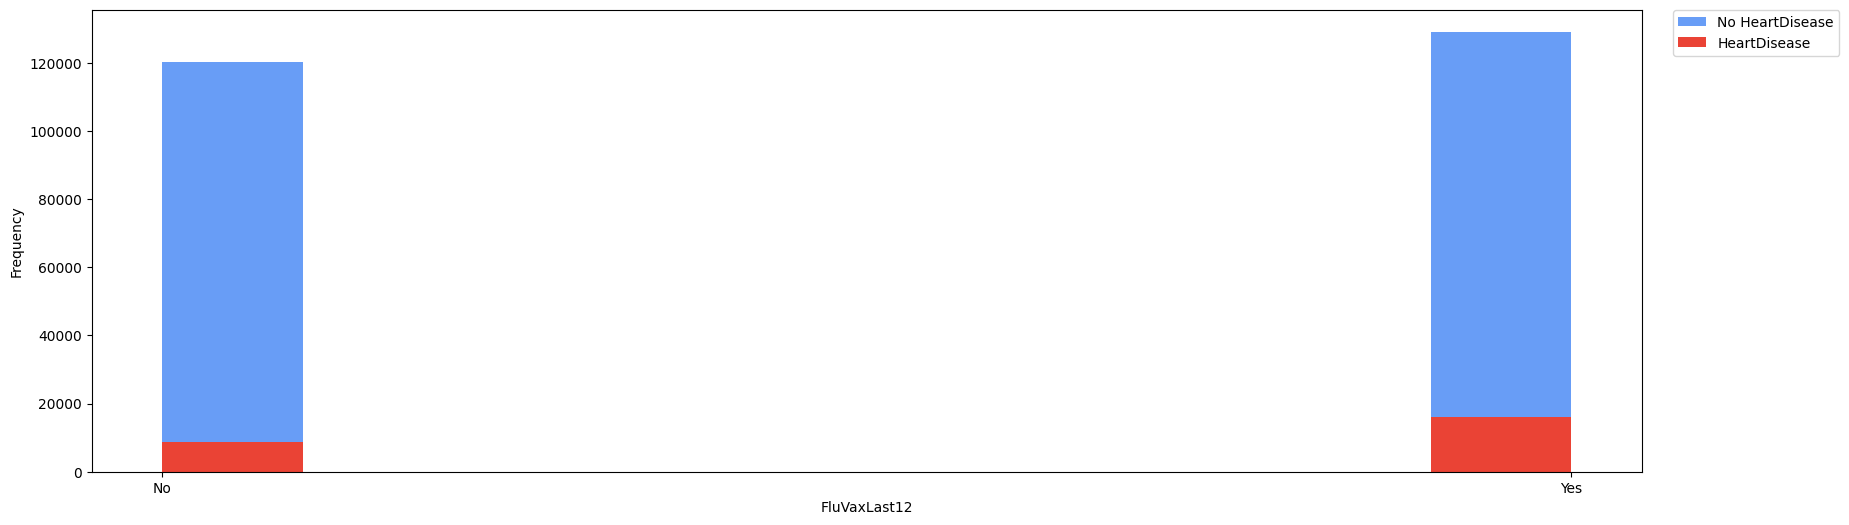

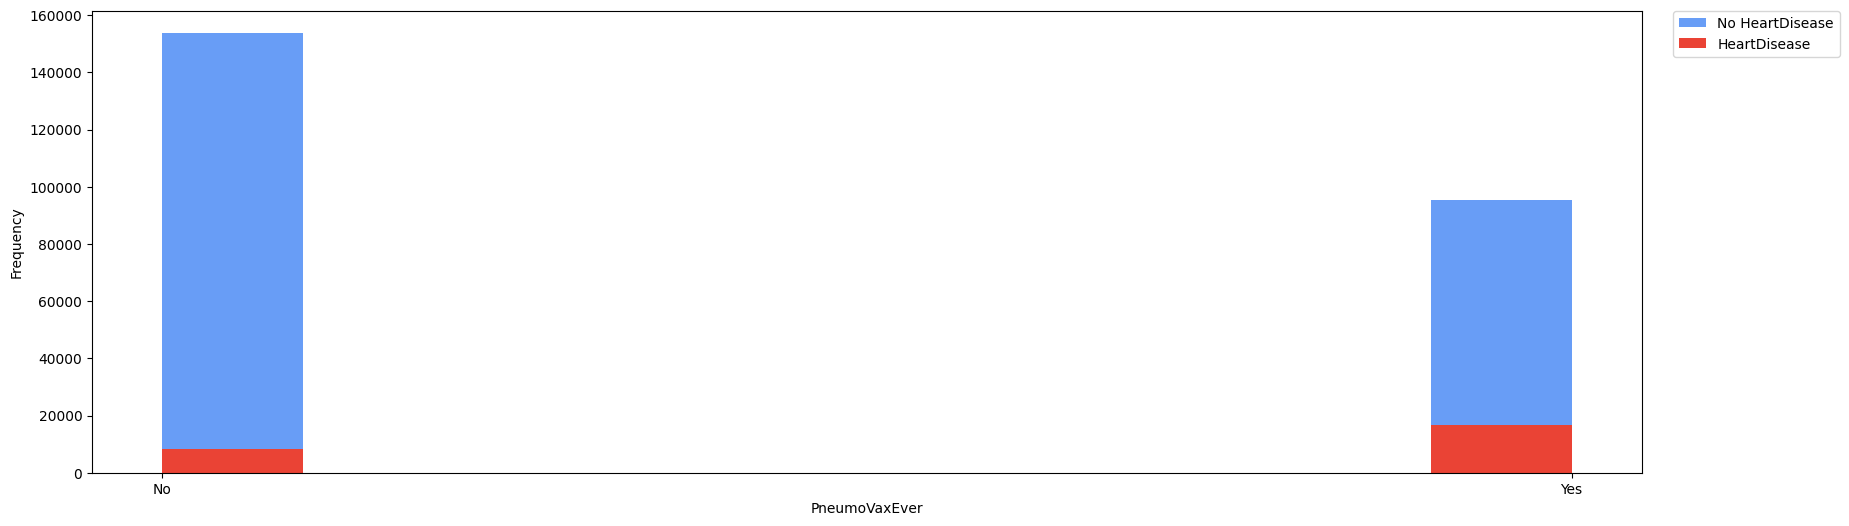

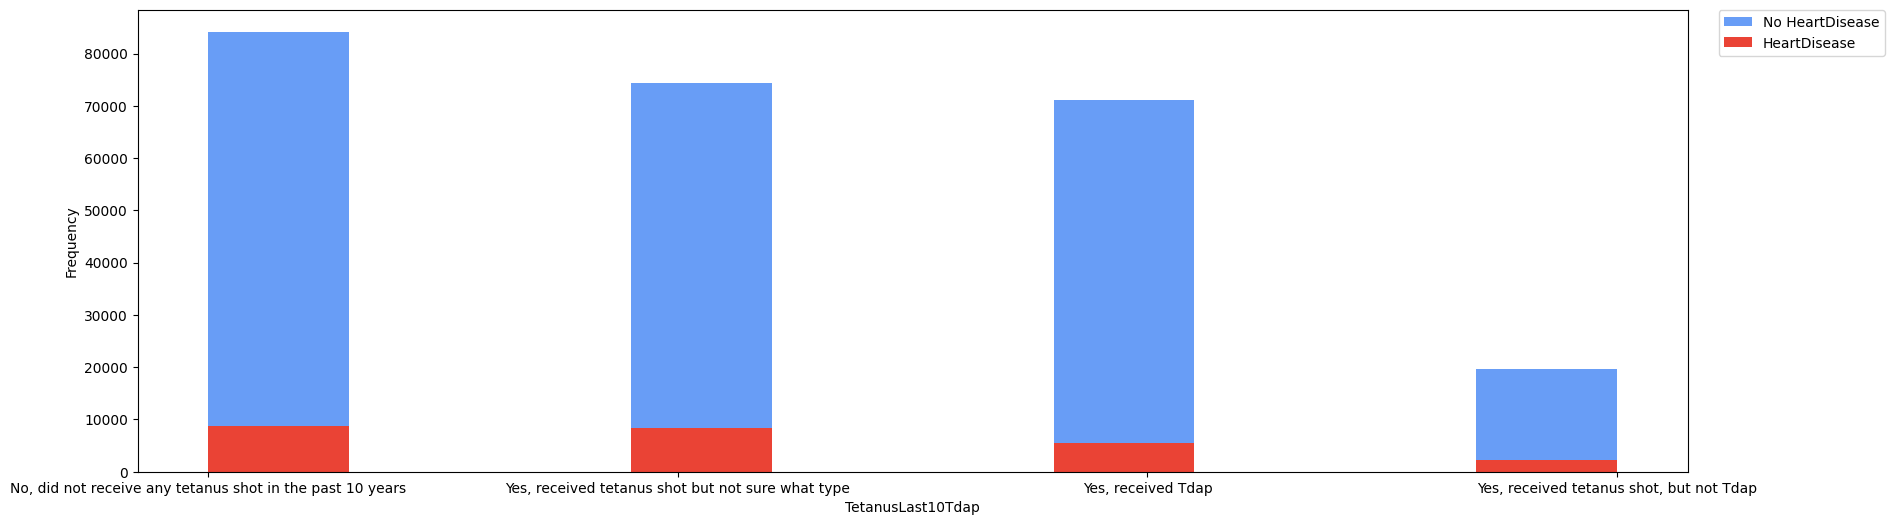

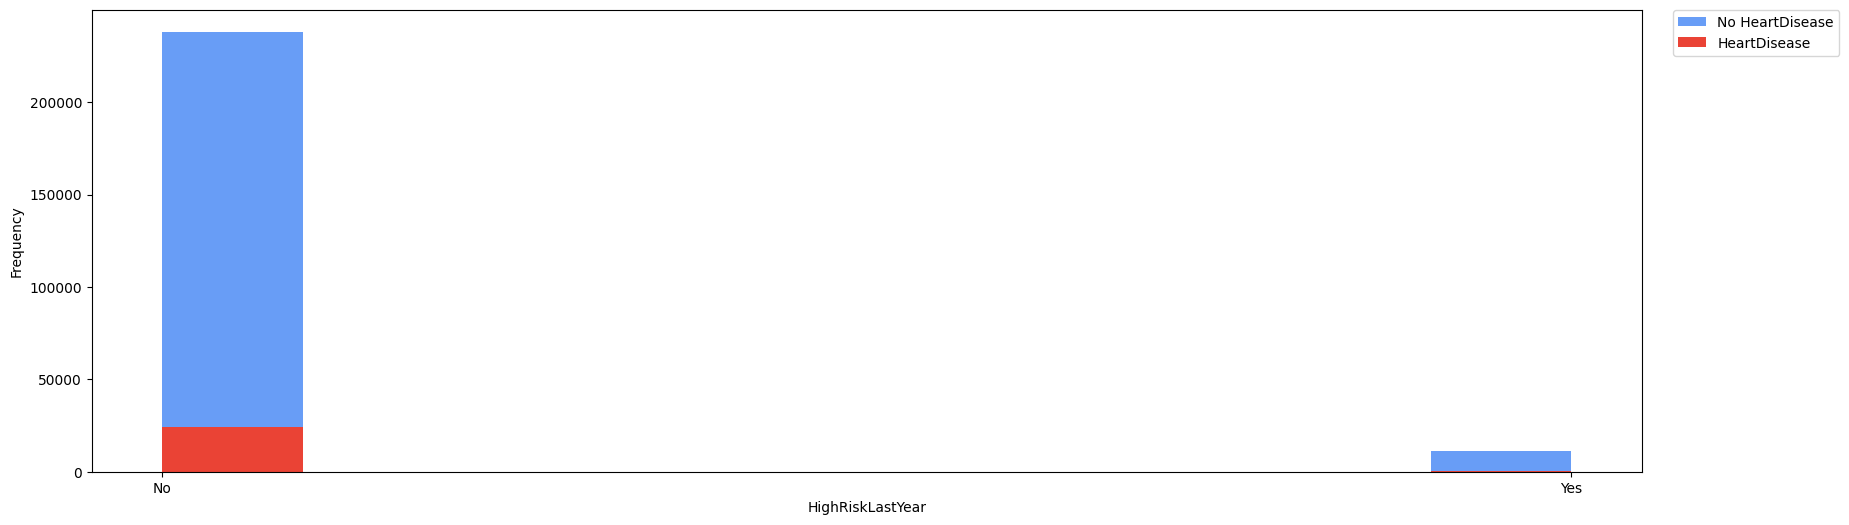

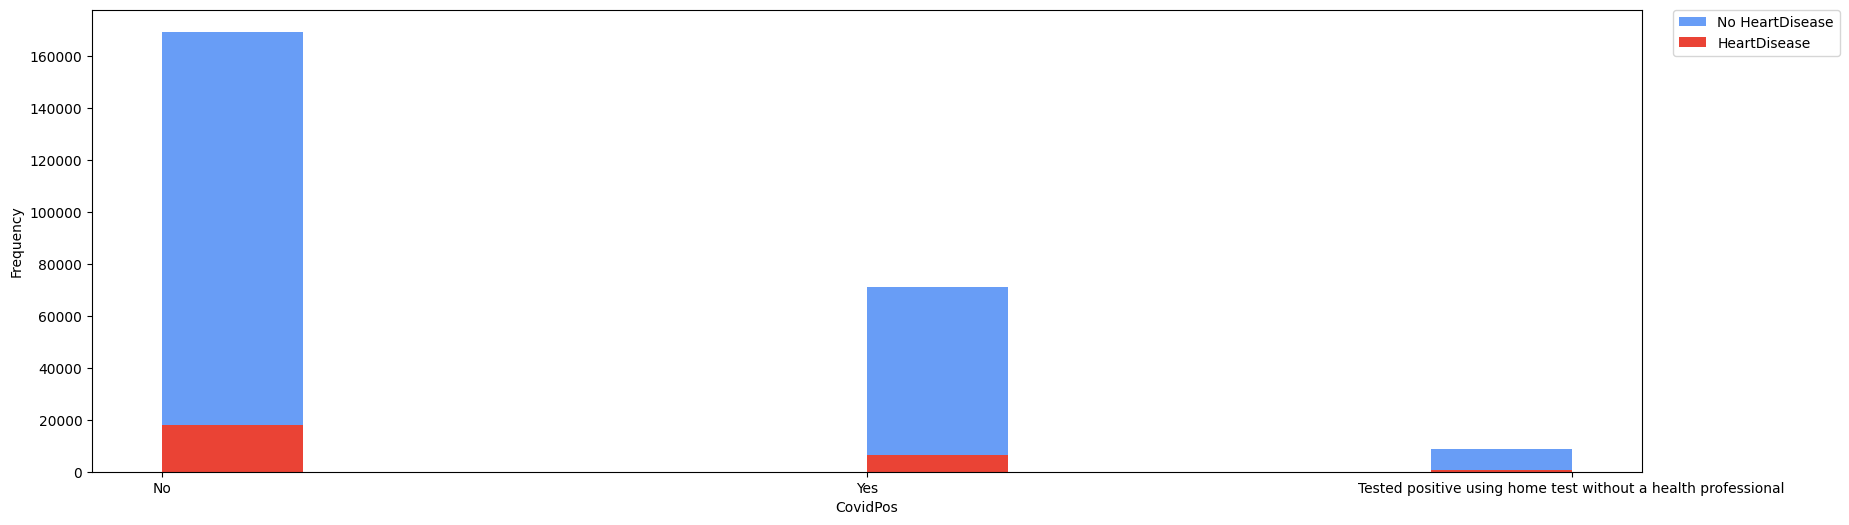

In [31]:
#전체적인 feature 들의 심장병 있는 사람의 숫자 보기
for col in category_cols[1:]:
    fig, ax = plt.subplots(figsize = (20,6))

    ax.hist(df[df["HeartDisease"]==0][col],  alpha=0.8, color="#4285f4", label="No HeartDisease")
    ax.hist(df[df["HeartDisease"]==1][col],  alpha=1, color="#ea4335", label="HeartDisease")

    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

    ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

남자가 여자보다 심장병 있는사람이 더 많다.

<AxesSubplot: xlabel='Sex'>

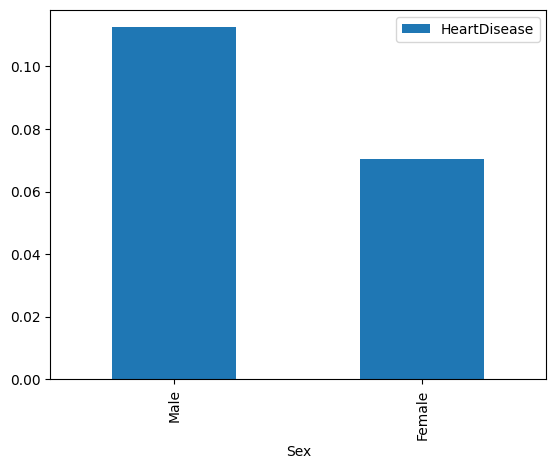

In [32]:
df[['Sex', 'HeartDisease']].groupby(['Sex']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#남자 1, 여자 0

담배와 심장병의 연관성

<AxesSubplot: xlabel='SmokerStatus'>

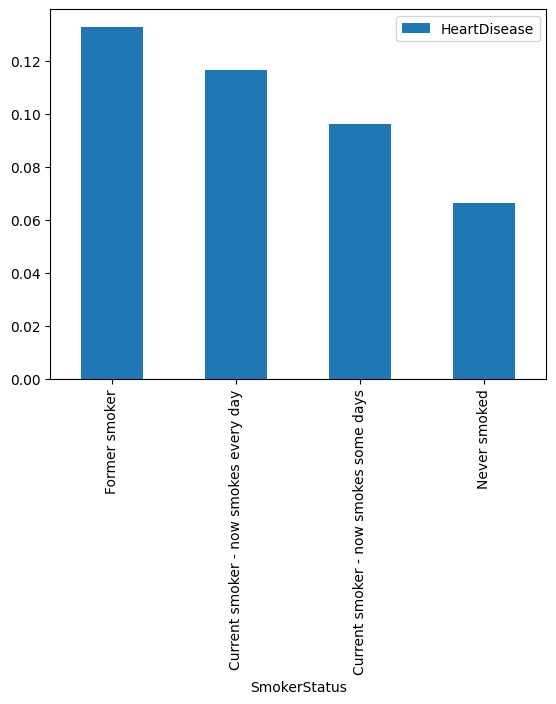

In [33]:
df[['SmokerStatus', 'HeartDisease']].groupby(['SmokerStatus']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#많이 피울수록 심장병 확률이 높음. 특이하게 전에 폈다가 말은 사람의 수치가 높음. (heart attack 으로만 보면 3,2,1,0 순으로 됨.)

In [34]:
#추가적으로 만약 담배 피는사람과 아닌사람만 묶어서 보기.
smoke_yes=len(df[df['SmokerStatus'].isin(['Current smoker - now smokes some days','Former smoker','Current smoker - now smokes every day'])])
smoke_no=len(df[df['SmokerStatus']=='Never smoked'])
smoke_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['SmokerStatus'].isin(['Current smoker - now smokes some days','Former smoker','Current smoker - now smokes every day']))])
smoke_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['SmokerStatus']=='Never smoked')])
print('흡연자의 심장질환 확률:',smoke_yes_heart_disease/smoke_yes)
print('비흡연자의 심장질환 확률:',smoke_no_heart_disease/smoke_no)

흡연자의 심장질환 확률: 0.12620724711349937
비흡연자의 심장질환 확률: 0.06626145753237402


<AxesSubplot: xlabel='ECigaretteUsage'>

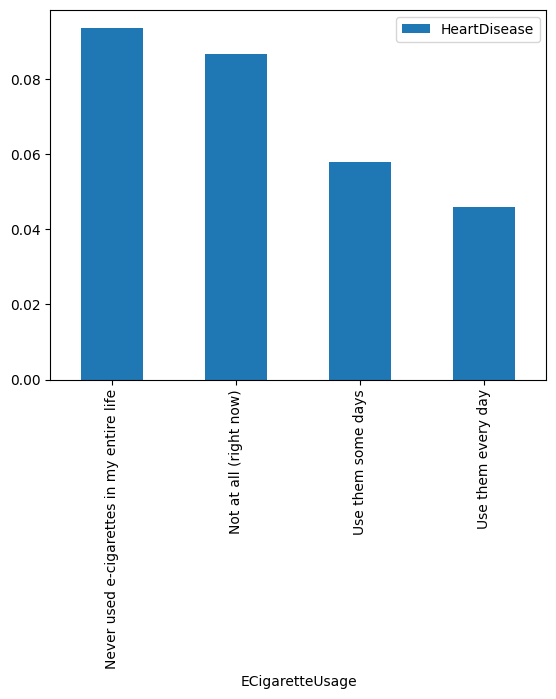

In [35]:
df[['ECigaretteUsage', 'HeartDisease']].groupby(['ECigaretteUsage']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#많이 피우는 사람이 좀더 낮음. (예상과는 다른 결과)

<AxesSubplot: xlabel='ECigaretteUsage,SmokerStatus'>

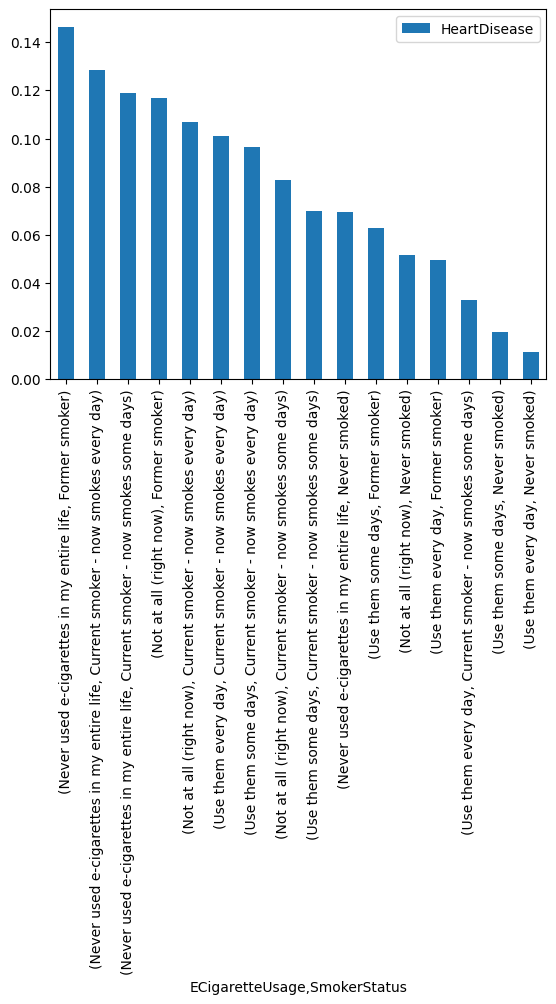

In [36]:
df[['ECigaretteUsage', 'SmokerStatus', 'HeartDisease']].groupby(['ECigaretteUsage', 'SmokerStatus']).mean().sort_values(by = ['HeartDisease'], ascending = False).plot.bar()

#그냥 담배 피우는사람이랑 전자담배 피우는사람 합쳐서 heart disease 보기.
#위에 데이터랑 비슷하게 전자담배 피우는 경우 확률 낮고, 담배 많이 필수록 확률이 높음. 

히스페닉인 사람들의 심장병 확률이 제일 낮다

<AxesSubplot: xlabel='RaceEthnicityCategory'>

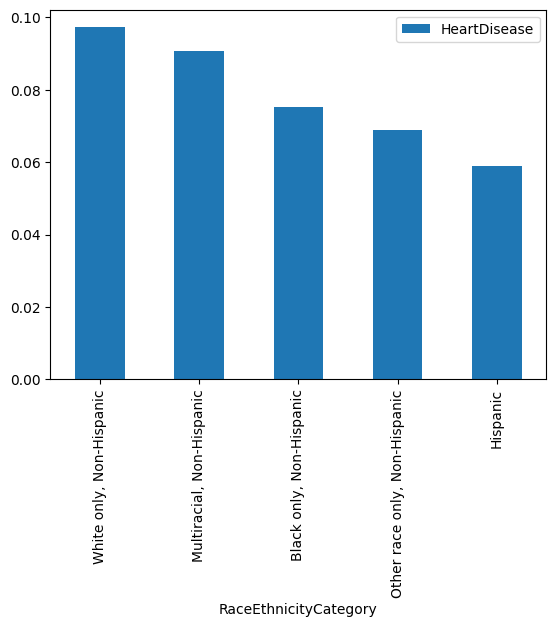

In [37]:
df[['RaceEthnicityCategory', 'HeartDisease']].groupby(['RaceEthnicityCategory']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#can observe hispanic people has lowest rate of heart disease while white have the highest chance.

나이가 많을수록 심장병 걸릴 확률이 높다

<AxesSubplot: xlabel='AgeCategory'>

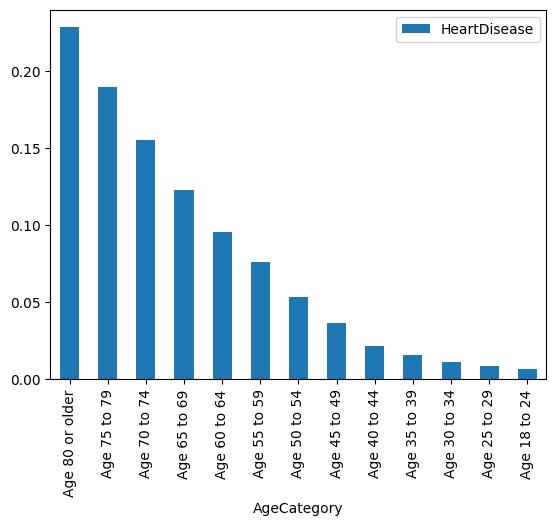

In [38]:
df[['AgeCategory', 'HeartDisease']].groupby(['AgeCategory']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#the older they are, higher chance of heart disease

# sns.violinplot(data=temp_encoded, x='HeartDisease', y='AgeCategory')

술 마시는 사람의 심장병 확률이 더 낮음

<AxesSubplot: xlabel='AlcoholDrinkers'>

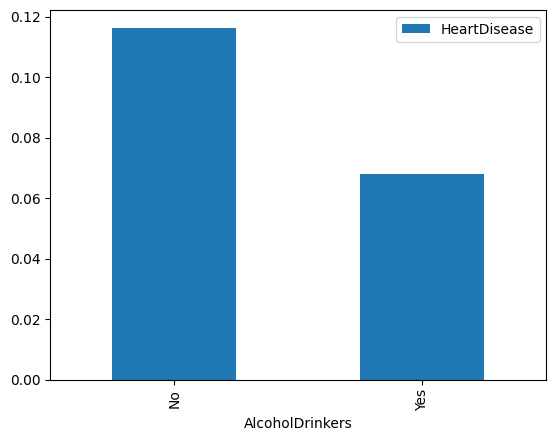

In [39]:
df[['AlcoholDrinkers', 'HeartDisease']].groupby(['AlcoholDrinkers']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

PneumoVax 라는 폐렴 주사를 맞은 사람들의 심장병 확률이 높음

<AxesSubplot: xlabel='PneumoVaxEver'>

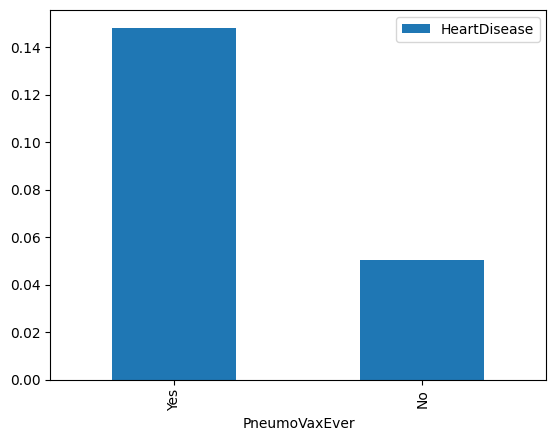

In [40]:
df[['PneumoVaxEver', 'HeartDisease']].groupby(['PneumoVaxEver']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

당뇨 있는 사람들의 확률이 더 높음.

<AxesSubplot: xlabel='HadDiabetes'>

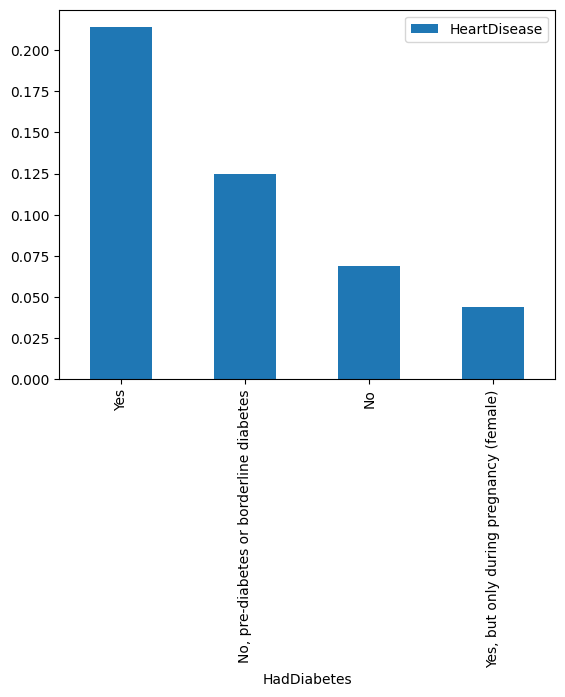

In [41]:
df[['HadDiabetes', 'HeartDisease']].groupby(['HadDiabetes']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

심장병이 더 많이 걸리는 지역들도 있음.

<AxesSubplot: xlabel='State'>

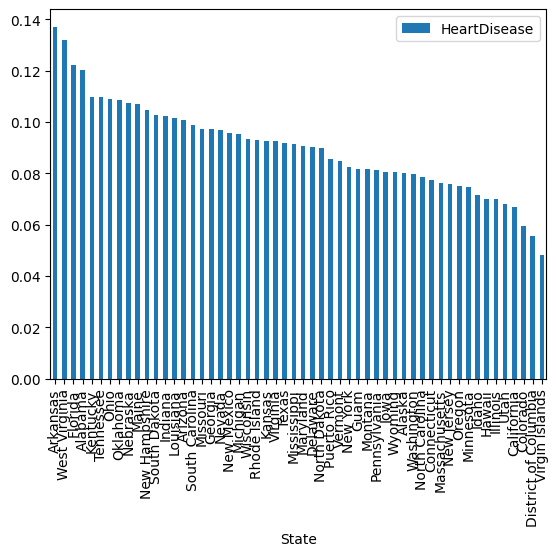

In [42]:
df[['State', 'HeartDisease']].groupby(['State']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

# Encoding

In [15]:
#나이 인코딩
ages = {
    'Age 80 or older': 80,
    'Age 55 to 59': 55,
    'Age 40 to 44': 40,
    'Age 75 to 79': 75,
    'Age 70 to 74': 70,
    'Age 65 to 69': 65,
    'Age 60 to 64': 60,
    'Age 50 to 54': 50,
    'Age 45 to 49': 45,
    'Age 35 to 39': 35,
    'Age 30 to 34': 30,
    'Age 25 to 29': 25,
    'Age 18 to 24': 18
}

df['AgeCategory'] = df['AgeCategory'].map(lambda x: ages[x])

In [16]:

#General Health encoding
df.loc[df["GeneralHealth"] == "Poor","GeneralHealth"] = 0
df.loc[df["GeneralHealth"] == "Fair","GeneralHealth"] = 1
df.loc[df["GeneralHealth"] == "Good","GeneralHealth"] = 2
df.loc[df["GeneralHealth"] == "Very good","GeneralHealth"] = 3
df.loc[df["GeneralHealth"] == "Excellent","GeneralHealth"] = 4
df["GeneralHealth"] = df["GeneralHealth"].astype('int32')

#Last check up time encoding
df.loc[df["LastCheckupTime"] == "Within past year (anytime less than 12 months ago)","LastCheckupTime"] = 0
df.loc[df["LastCheckupTime"] == "Within past 2 years (1 year but less than 2 years ago)","LastCheckupTime"] = 1
df.loc[df["LastCheckupTime"] == "Within past 5 years (2 years but less than 5 years ago)","LastCheckupTime"] = 2
df.loc[df["LastCheckupTime"] == "5 or more years ago","LastCheckupTime"] = 3
df["LastCheckupTime"] = df["LastCheckupTime"].astype('int32')

#SmokerStatus
df.loc[df["SmokerStatus"] == "Never smoked","SmokerStatus"] = 0
df.loc[df["SmokerStatus"] == "Former smoker","SmokerStatus"] = 1
df.loc[df["SmokerStatus"] == "Current smoker - now smokes some days","SmokerStatus"] = 2
df.loc[df["SmokerStatus"] == "Current smoker - now smokes every day","SmokerStatus"] = 3
df["SmokerStatus"] = df["SmokerStatus"].astype('int32')


#ECigaretteUsage
df.loc[df["ECigaretteUsage"] == "Never used e-cigarettes in my entire life","ECigaretteUsage"] = 0
df.loc[df["ECigaretteUsage"] == "Not at all (right now)","ECigaretteUsage"] = 1
df.loc[df["ECigaretteUsage"] == "Use them some days","ECigaretteUsage"] = 2
df.loc[df["ECigaretteUsage"] == "Use them every day","ECigaretteUsage"] = 3
df["ECigaretteUsage"] = df["ECigaretteUsage"].astype('int32')


#RemovedTeeth
df.loc[df["RemovedTeeth"] == "None of them","RemovedTeeth"] = 0
df.loc[df["RemovedTeeth"] == "None of Them","RemovedTeeth"] = 0
df.loc[df["RemovedTeeth"] == "1 to 5","RemovedTeeth"] = 1
df.loc[df["RemovedTeeth"] == "6 or more, but not all","RemovedTeeth"] = 2
df.loc[df["RemovedTeeth"] == "All","RemovedTeeth"] = 3
df["RemovedTeeth"] = df["RemovedTeeth"].astype('int32')

#HadDiabetes
df.loc[df["HadDiabetes"] == "No","HadDiabetes"] = 0
df.loc[df["HadDiabetes"] == "Yes, but only during pregnancy (female)","HadDiabetes"] = 0
df.loc[df["HadDiabetes"] == "No, pre-diabetes or borderline diabetes","HadDiabetes"] = 1
df.loc[df["HadDiabetes"] == "Yes","HadDiabetes"] = 2
df["HadDiabetes"] = df["HadDiabetes"].astype('int32')

#Covid
df['CovidPos'].replace({'Tested positive using home test without a health professional' : 'Yes'}, inplace=True)

#RaceEthnicityCategory Hispanic = 0, non hispanic = 1
df.loc[df["RaceEthnicityCategory"] == "Black only, Non-Hispanic","RaceEthnicityCategory"] = 1
df.loc[df["RaceEthnicityCategory"] == "Multiracial, Non-Hispanic","RaceEthnicityCategory"] = 1
df.loc[df["RaceEthnicityCategory"] == "Other race only, Non-Hispanic","RaceEthnicityCategory"] = 1
df.loc[df["RaceEthnicityCategory"] == "White only, Non-Hispanic","RaceEthnicityCategory"] = 1
df.loc[df["RaceEthnicityCategory"] == "Hispanic","RaceEthnicityCategory"] = 0
df["RaceEthnicityCategory"] = df["RaceEthnicityCategory"].astype('int32')


In [17]:
df = pd.get_dummies(df, columns = ['TetanusLast10Tdap'])
le = LabelEncoder()
for columns in df.select_dtypes(include = ['object', 'bool']).columns:
    df[columns] = le.fit_transform(df[columns])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274034 entries, 1 to 445131
Data columns (total 44 columns):
 #   Column                                                                       Non-Null Count   Dtype  
---  ------                                                                       --------------   -----  
 0   State                                                                        274034 non-null  int32  
 1   Sex                                                                          274034 non-null  int32  
 2   GeneralHealth                                                                274034 non-null  int32  
 3   PhysicalHealthDays                                                           274034 non-null  float64
 4   MentalHealthDays                                                             274034 non-null  float64
 5   LastCheckupTime                                                              274034 non-null  int32  
 6   PhysicalActivities          

# 이상치 체크

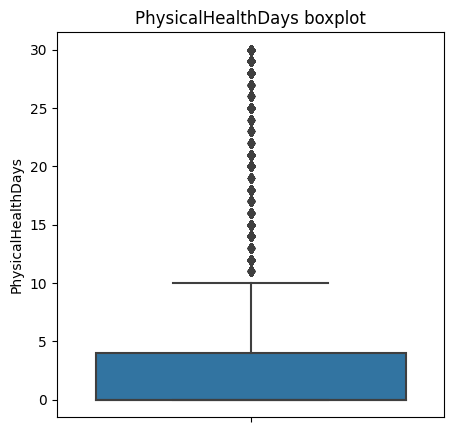

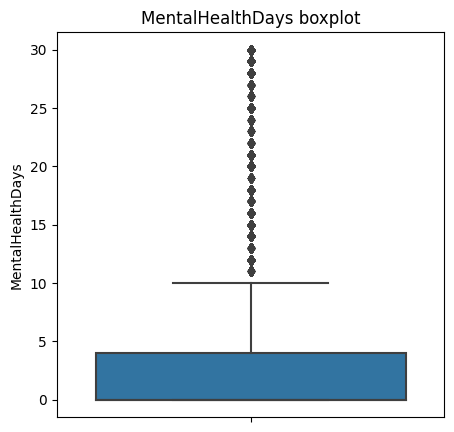

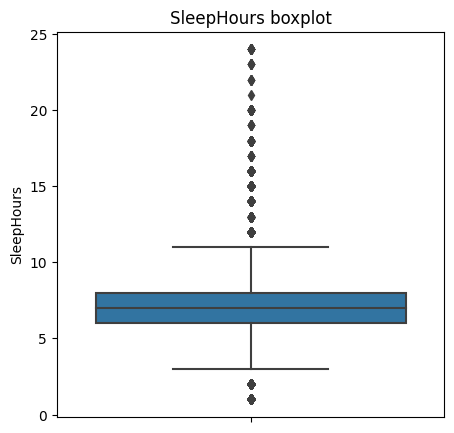

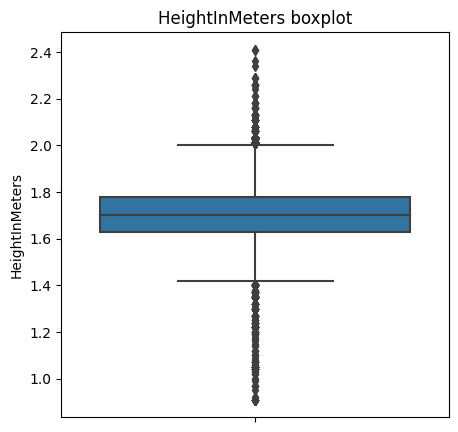

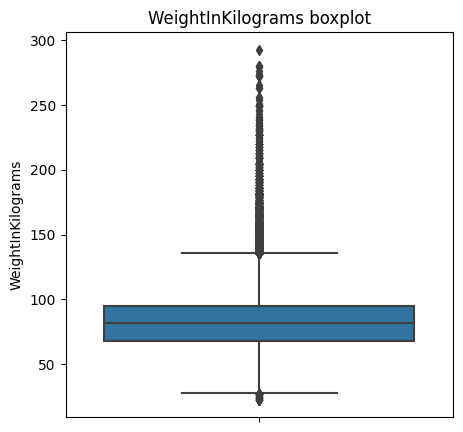

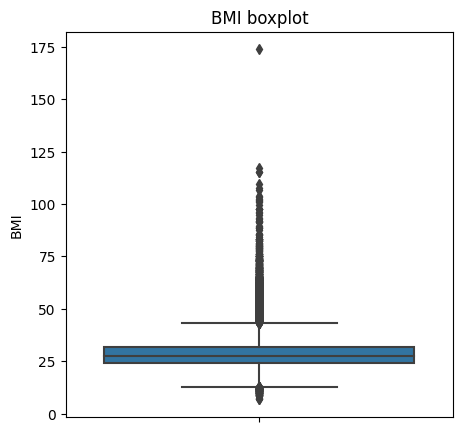

In [19]:
for col in df.select_dtypes(include = [float]).columns:
    f,ax=plt.subplots(1,figsize=(5,5))
    plt.title(col + " boxplot")
    sns.boxplot(data=df,y=col)


In [20]:
#나누기전에 이상치 제거. Height, weight , BMI, sleeping hour 에 비정상적인 데이터들이 보임. 
# 다른 float 데이터인 physical day health, mental day health 는 계속 아프거나 안아플수 있다고 생각함.

arr = []

for cols in df[['BMI', 'SleepHours', 'WeightInKilograms', 'HeightInMeters']]:
    Q1 = np.percentile(df[cols], 25, method='midpoint')
    Q3 = np.percentile(df[cols], 75, method='midpoint')
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    upper_array = df.loc[df[cols] >= upper].index.values
    lower_array = df.loc[df[cols] <= lower].index.values
    # create bool val to indicate outlier rows.
    # array = np.where(temp_encoded[cols] <= lower or temp_encoded[cols] >= upper)[0]
    # lower_array = np.where(temp_encoded[cols] <= lower)[0]

    arr = np.hstack((arr , upper_array , lower_array))


    
# remove the outliers
df.drop(index=np.unique(arr), inplace=True)

# temp_encoded.shape

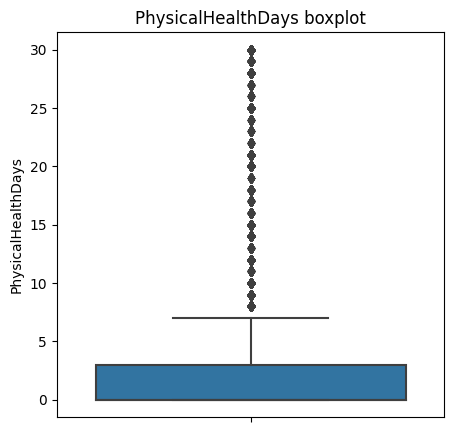

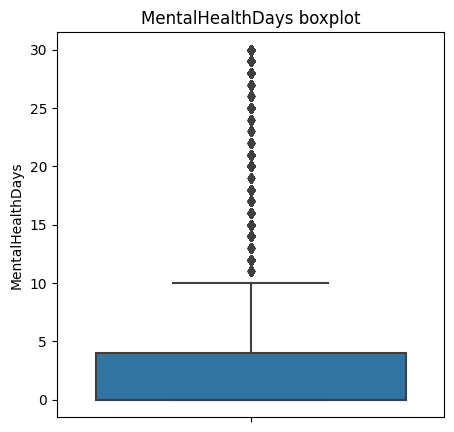

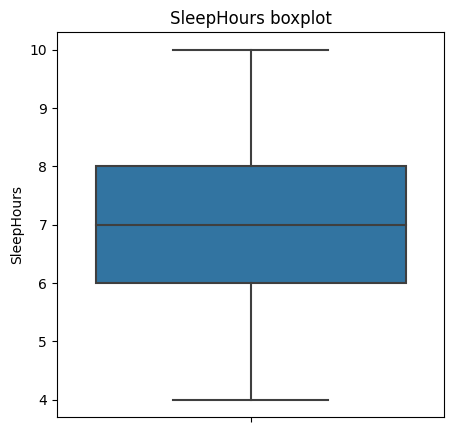

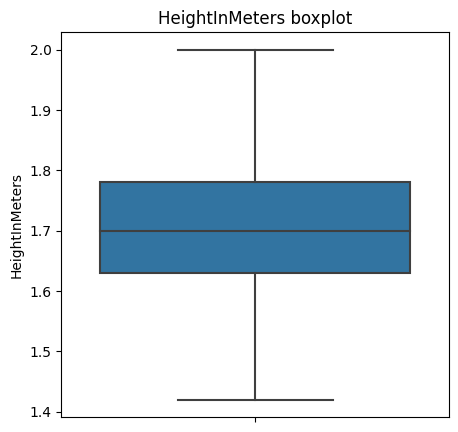

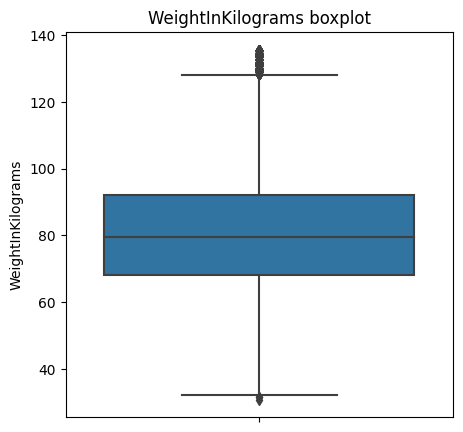

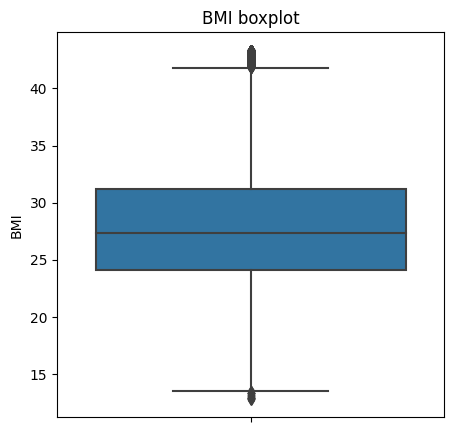

In [21]:
for col in df.select_dtypes(include = [float]).columns:
    f,ax=plt.subplots(1,figsize=(5,5))
    plt.title(col + " boxplot")
    sns.boxplot(data = df,y=col)


# Data imbalance 처리

위에서 보았던 심장병 걸린 사람과 아닌 사람의 편차가 크기때문에 불균형을 처리하기 위해서 진행.

In [22]:
X = df.drop(columns=['HeartDisease', "HadHeartAttack", "HadAngina" ])
y = df['HeartDisease']

In [23]:
smo = SMOTE(k_neighbors=4,random_state = 1234)
X_smo, y_smo = smo.fit_resample(X, y)
print('Original data:', len(X))
print('Resampled data:', len(X_smo))

Original data: 256582
Resampled data: 468114


In [24]:
print(df[df['HeartDisease'] == 1].duplicated().sum())
smo_tmp = pd.concat([X_smo, y_smo], axis = 1)
print(smo_tmp[smo_tmp['HeartDisease'] == 1].duplicated().sum())

1
860


# 스케일링

In [25]:
from sklearn.preprocessing import StandardScaler,RobustScaler,Normalizer

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size = 0.2, random_state = 1234)

In [27]:
std=StandardScaler()
robust=RobustScaler()
norm=Normalizer()
std_x_train=std.fit_transform(X_train)
robust_x_train=robust.fit_transform(X_train)
norm_x_train=norm.fit_transform(X_train)
std_x_test=std.transform(X_test)
robust_x_test=robust.transform(X_test)
norm_x_test=norm.transform(X_test)

# 모델링

In [29]:
import lightgbm as lgb
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier,Pool
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [35]:
data=[(std_x_train,std_x_test,'StandardScaler'),(robust_x_train,robust_x_test,'RobustScaler'),(norm_x_train,norm_x_test,'Normalizer')]

In [69]:
def lgb_func(x_train,y_train,x_test,y_test):
    model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=1234, verbose=-1)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    print(f'LightGBM Accuracy : {acc*100:.2f}%')
    print(f'f1 score: {f1_score(y_test,pred)}')

In [72]:
for x_train,x_test,scaler in data:
    print(scaler)
    lgb_func(x_train,y_train,x_test,y_test)

StandardScaler
LightGBM Accuracy : 94.29%
f1 score: 0.9405712888997523
RobustScaler
LightGBM Accuracy : 94.31%
f1 score: 0.940827350123369
Normalizer
LightGBM Accuracy : 89.84%
f1 score: 0.895999125491911


In [74]:
def sgd_func(x_train,y_train,x_test,y_test):
    model=SGDClassifier(random_state=1234)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print(f'SGD Accuracy : {acc*100:.2f}%')
    print(f'f1 score : {f1_score(y_test,pred)}')

In [75]:
for x_train,x_test,scaler in data:
    print(scaler)
    sgd_func(x_train,y_train,x_test,y_test)

StandardScaler
SGD Accuracy : 88.17%
f1 score : 0.8787729497158997
RobustScaler
SGD Accuracy : 87.95%
f1 score : 0.8795962355150558
Normalizer
SGD Accuracy : 73.88%
f1 score : 0.7784702344287836


In [76]:
def tree_func(x_train,y_train,x_test,y_test):
    model=DecisionTreeClassifier(random_state=1234)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print(f'DecisionTree Accracy : {acc*100:.2f}%')
    print(f'f1 score : {f1_score(y_test,pred)}')

In [77]:
for x_train,x_test,scaler in data:
    print(scaler)
    tree_func(x_train,y_train,x_test,y_test)

StandardScaler
DecisionTree Accracy : 90.42%
f1 score : 0.9056309862119778
RobustScaler
DecisionTree Accracy : 90.42%
f1 score : 0.9055618710791125
Normalizer
DecisionTree Accracy : 89.18%
f1 score : 0.8941146960147995


In [78]:
def ada_func(x_train,y_train,x_test,y_test):
    model=AdaBoostClassifier(random_state=1234)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print(f'AdaBoost Accuracy : {acc*100:.2f}%')
    print(f'f1 score : {f1_score(y_test,pred)}')

In [79]:
for x_train,x_test,scaler in data:
    print(scaler)
    ada_func(x_train,y_train,x_test,y_test)

StandardScaler
AdaBoost Accuracy : 89.09%
f1 score : 0.890362738785147
RobustScaler
AdaBoost Accuracy : 89.09%
f1 score : 0.890362738785147
Normalizer
AdaBoost Accuracy : 87.32%
f1 score : 0.8724010100467415


In [82]:
def rf_func(x_train,y_train,x_test,y_test):
    model=RandomForestClassifier(random_state=1234)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print(f'RandomForest Accuracy : {acc*100:.2f}%')
    print(f'f1 score : {f1_score(y_test,pred)}')

In [83]:
for x_train,x_test,scaler in data:
    print(scaler)
    rf_func(x_train,y_train,x_test,y_test)

StandardScaler
RandomForest Accuracy : 94.46%
f1 score : 0.9431334707662619
RobustScaler
RandomForest Accuracy : 94.46%
f1 score : 0.9430962067793264
Normalizer
RandomForest Accuracy : 93.92%
f1 score : 0.9379502773872195


In [38]:
def logistic_func(x_train,y_train,x_test,y_test):
    model=LogisticRegression(random_state=1234)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print(f'Logistic Accuracy : {acc*100:.2f}%')
    print(f'f1 score : {f1_score(y_test,pred)}')

In [39]:
for x_train,x_test,scaler in data:
    print(scaler)
    logistic_func(x_train,y_train,x_test,y_test)

StandardScaler


Logistic Accuracy : 88.25%
f1 score : 0.8795253265022387
RobustScaler
Logistic Accuracy : 88.24%
f1 score : 0.8795236114455852
Normalizer
Logistic Accuracy : 84.28%
f1 score : 0.8480756524611827


d:\anaconda\envs\yolo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
def cat_func(x_train,y_train,x_test,y_test):
    model=CatBoostClassifier(random_state=1234,silent=True)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print(f'CatBoost Accuracy : {acc*100:.2f}%')
    print(f'f1 score : {f1_score(y_test,pred)}')

In [87]:
for x_train,x_test,scaler in data:
    print(scaler)
    cat_func(x_train,y_train,x_test,y_test)

StandardScaler
CatBoost Accuracy : 94.74%
f1 score : 0.945465828872857
RobustScaler
CatBoost Accuracy : 94.77%
f1 score : 0.9457548215473287
Normalizer
CatBoost Accuracy : 91.33%
f1 score : 0.9115901144743005


In [36]:
def knn_func(x_train,y_train,x_test,y_test):
    model=KNeighborsClassifier()
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print(f'KNN Accuracy : {acc*100:.2f}%')
    print(f'f1 score : {f1_score(y_test,pred)}')

In [37]:
for x_train,x_test,scaler in data:
    print(scaler)
    knn_func(x_train,y_train,x_test,y_test)

StandardScaler
KNN Accuracy : 88.98%
f1 score : 0.8944104463865409
RobustScaler
KNN Accuracy : 87.59%
f1 score : 0.8869600755091516
Normalizer
KNN Accuracy : 84.66%
f1 score : 0.8666499549712652


In [40]:
def svm_func(x_train,y_train,x_test,y_test):
    model=SVC(random_state=1234)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print(f'SVM Accuracy : {acc*100:.2f}%')
    print(f'f1 score : {f1_score(y_test,pred)}')

In [ ]:
for x_train,x_test,scaler in data:
    print(scaler)
    svm_func(x_train,y_train,x_test,y_test)

# Deep Learning

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [29]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [30]:
es = EarlyStopping(monitor = 'accuracy')

model = Sequential()
model.add(Dense(50, input_dim = 41, activation = 'relu'))
model.add(Dense(28, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', f1_m, precision_m, recall_m])


# StandardScaler

Epoch 1/100
23406/23406 [==============================] - 41s 2ms/step - loss: 0.2261 - accuracy: 0.9008 - f1_m: 0.8917 - precision_m: 0.9204 - recall_m: 0.8776
Epoch 2/100
23406/23406 [==============================] - 43s 2ms/step - loss: 0.2257 - accuracy: 0.9010 - f1_m: 0.8921 - precision_m: 0.9193 - recall_m: 0.8791
Epoch 3/100
23406/23406 [==============================] - 41s 2ms/step - loss: 0.2255 - accuracy: 0.9013 - f1_m: 0.8922 - precision_m: 0.9207 - recall_m: 0.8782
Epoch 4/100
23406/23406 [==============================] - 42s 2ms/step - loss: 0.2252 - accuracy: 0.9014 - f1_m: 0.8924 - precision_m: 0.9210 - recall_m: 0.8781
Epoch 5/100
23406/23406 [==============================] - 42s 2ms/step - loss: 0.2252 - accuracy: 0.9015 - f1_m: 0.8925 - precision_m: 0.9194 - recall_m: 0.8799
Epoch 6/100
23406/23406 [==============================] - 43s 2ms/step - loss: 0.2246 - accuracy: 0.9017 - f1_m: 0.8927 - precision_m: 0.9210 - recall_m: 0.8785
Epoch 7/100
23406/23406 [===

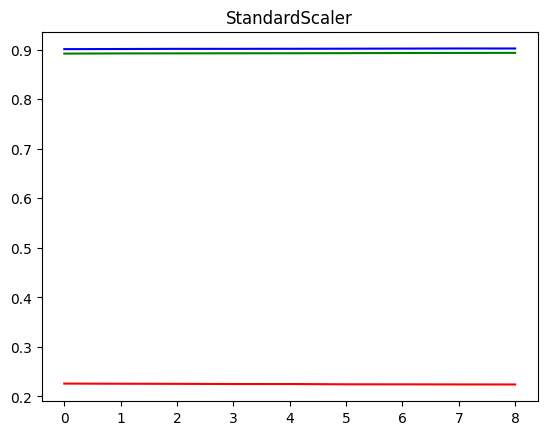

In [33]:
history = model.fit(std_x_train, y_train, epochs = 100, batch_size = 16, callbacks = [es])
loss, acc, f1, precision, recall = model.evaluate(std_x_train, y_train)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {acc*100:.2f}%')
print(f'F1 Score: {f1:.4f}')
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_f1 = history.history['f1_m']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_loss,  c = 'red', markersize = 3)
plt.plot(x_len, y_acc, c = 'blue', markersize = 3)
plt.plot(x_len, y_f1, c = 'green', markersize = 3)
plt.title('StandardScaler')
plt.show()

# RobustScaler

Epoch 1/100
23406/23406 [==============================] - 43s 2ms/step - loss: 0.2248 - accuracy: 0.9018 - f1_m: 0.8931 - precision_m: 0.9198 - recall_m: 0.8805
Epoch 2/100
23406/23406 [==============================] - 41s 2ms/step - loss: 0.2245 - accuracy: 0.9019 - f1_m: 0.8925 - precision_m: 0.9187 - recall_m: 0.8804
Epoch 3/100
23406/23406 [==============================] - 41s 2ms/step - loss: 0.2242 - accuracy: 0.9019 - f1_m: 0.8932 - precision_m: 0.9201 - recall_m: 0.8802
Epoch 4/100
23406/23406 [==============================] - 41s 2ms/step - loss: 0.2238 - accuracy: 0.9022 - f1_m: 0.8936 - precision_m: 0.9204 - recall_m: 0.8808
Epoch 5/100
23406/23406 [==============================] - 42s 2ms/step - loss: 0.2235 - accuracy: 0.9027 - f1_m: 0.8938 - precision_m: 0.9204 - recall_m: 0.8813
Epoch 6/100
11703/11703 [==============================] - 17s 1ms/step - loss: 0.2216 - accuracy: 0.9031 - f1_m: 0.8984 - precision_m: 0.9179 - recall_m: 0.8854
Loss: 0.2216
Accuracy: 90.31

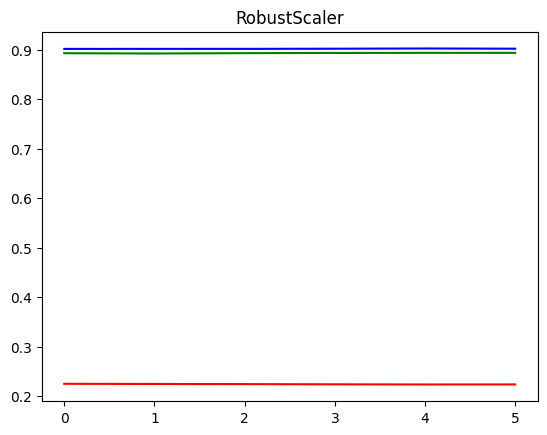

In [36]:
history = model.fit(robust_x_train, y_train, epochs = 100, batch_size = 16, callbacks = [es])
loss, acc, f1, precision, recall = model.evaluate(robust_x_train, y_train)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {acc*100:.2f}%')
print(f'F1 Score: {f1:.4f}')
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_f1 = history.history['f1_m']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_loss,  c = 'red', markersize = 3)
plt.plot(x_len, y_acc, c = 'blue', markersize = 3)
plt.plot(x_len, y_f1, c = 'green', markersize = 3)
plt.title('RobustScaler')
plt.show()

# NormalizerScaler

Epoch 1/100
23406/23406 [==============================] - 43s 2ms/step - loss: 0.3485 - accuracy: 0.8439 - f1_m: 0.8336 - precision_m: 0.8604 - recall_m: 0.8355
Epoch 2/100
23406/23406 [==============================] - 42s 2ms/step - loss: 0.2833 - accuracy: 0.8720 - f1_m: 0.8588 - precision_m: 0.9010 - recall_m: 0.8403
Epoch 3/100
23406/23406 [==============================] - 45s 2ms/step - loss: 0.2749 - accuracy: 0.8755 - f1_m: 0.8631 - precision_m: 0.9021 - recall_m: 0.8457
Epoch 4/100
23406/23406 [==============================] - 51s 2ms/step - loss: 0.2702 - accuracy: 0.8778 - f1_m: 0.8660 - precision_m: 0.9030 - recall_m: 0.8497
Epoch 5/100
23406/23406 [==============================] - 48s 2ms/step - loss: 0.2665 - accuracy: 0.8797 - f1_m: 0.8684 - precision_m: 0.9033 - recall_m: 0.8530
Epoch 6/100
23406/23406 [==============================] - 40s 2ms/step - loss: 0.2644 - accuracy: 0.8805 - f1_m: 0.8694 - precision_m: 0.9042 - recall_m: 0.8536
Epoch 7/100
23406/23406 [===

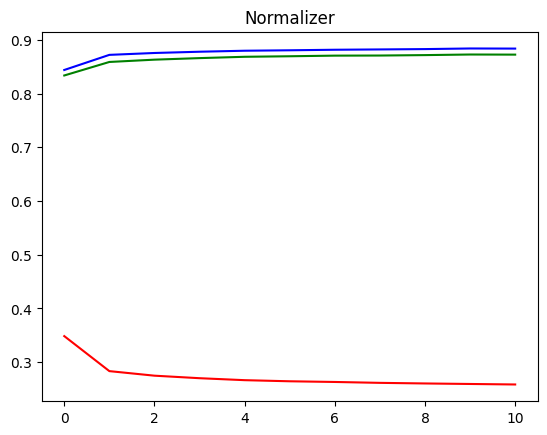

In [37]:
history = model.fit(norm_x_train, y_train, epochs = 100, batch_size = 16, callbacks = [es])
loss, acc, f1, precision, recall = model.evaluate(norm_x_train, y_train)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {acc*100:.2f}%')
print(f'F1 Score: {f1:.4f}')
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_f1 = history.history['f1_m']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_loss,  c = 'red', markersize = 3)
plt.plot(x_len, y_acc, c = 'blue', markersize = 3)
plt.plot(x_len, y_f1, c = 'green', markersize = 3)
plt.title('Normalizer')
plt.show()

In [29]:
class HeartDiseaseNet(nn.Module):
    def __init__(self):
        super(HeartDiseaseNet, self).__init__()

        self.fc1 = nn.Linear(41,64)
        self.fc2 = nn.Linear(64,48)
        self.fc3 = nn.Linear(48,32)
        self.fc4 = nn.Linear(32,16)
        self.fc5 = nn.Linear(16,8)
        self.output = nn.Linear(8,2)
        self.outact = nn.Sigmoid()
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        x = self.act(self.fc4(x))
        x = self.act(self.fc5(x))
        x = self.outact(self.output(x))
        return x

In [30]:
model = HeartDiseaseNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(HeartDiseaseNet())

HeartDiseaseNet(
  (fc1): Linear(in_features=41, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=48, bias=True)
  (fc3): Linear(in_features=48, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (fc5): Linear(in_features=16, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=2, bias=True)
  (outact): Sigmoid()
  (act): ReLU()
)


In [31]:
#tensor 로 변환
def make_tensor(x_train,x_test,y_train,y_test):
    X_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(pd.array(y_train), dtype=torch.long)
    y_test_tensor = torch.tensor(pd.array(y_test), dtype=torch.long)

    #그것으로 data loader 생성
    train_ds = TensorDataset(X_train_tensor, y_train_tensor)
    test_ds = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(dataset = train_ds, batch_size = 16, shuffle=True)
    test_loader = DataLoader(dataset = test_ds, batch_size = 16, shuffle=True)
    return train_loader,test_loader

In [32]:

# GPU 사용 가능 여부 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def learning(train_loader, test_loader, model, optimizer, loss_fn):
    model = model.to(device)  # 모델을 GPU로 옮김

    early_stopping_epochs = 5
    best_loss = float('inf')
    early_stop_counter = 0

    # 학습 루프
    for epoch in range(100):
        model.train()  # 모델을 학습 모드로 설정
        train_loss = 0.0
        for inputs, target in train_loader:
            inputs, target = inputs.to(device), target.to(device)  # 데이터를 GPU로 옮김

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # 검증 단계
        model.eval()  # 모델을 평가 모드로 설정
        valid_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, target in test_loader:
                inputs, target = inputs.to(device), target.to(device)
                outputs = model(inputs)
                loss = loss_fn(outputs, target)
                valid_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        # 조기 종료 조건 확인
        if valid_loss > best_loss:
            early_stop_counter += 1
            if early_stop_counter >= early_stopping_epochs:
                print(f'Epoch {epoch+1}: 조기 종료됨')
                break
        else:
            best_loss = valid_loss
            early_stop_counter = 0

        if (epoch+1) % 5 == 0:
            print(f'Epoch {epoch+1}, Loss: {train_loss / len(train_loader)}, Accuracy: {100 * correct / total:.2f}%')

# 다음과 같이 함수를 호출할 때 모델 및 기타 필요한 것들(예: optimizer, loss function)을 함께 전달합니다.
# learning(train_loader, test_loader, your_model, your_optimizer, your_loss_fn)


# 모델 평가 진행

In [33]:
def model_eval(test_loader):
    model.eval() # 모델 평가 모드
    with torch.no_grad(): # 기울기 계산 없음(평가시에는 모델 업데이트를 하지 않으므로)
        total = 0    
        correct = 0  
        for inputs, labels in test_loader: 
            outputs = model(inputs) 
            _, predicted = torch.max(outputs.data, 1) 
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test set: %2f %%' % (100 * correct / total))

In [36]:
for x_train,x_test,scaler in data:
    print(scaler)
    train_loader,test_loader=make_tensor(x_train,x_test,y_train,y_test)
    learning(train_loader,test_loader, model, optimizer, loss_fn)
    model_eval(test_loader)

StandardScaler
